# Scoutium Talent Scouting Classification with Machine Learning

### 1. Introduction

#### 1.1 Business Problem

- Predicting the class (average, highlighted) of players based on the ratings given to their attributes by scouts.

#### 1.2 Dataset Story

The dataset from Scoutium consists of information on the attributes of football players observed in matches, including the ratings given by scouts to these players and their specific attributes.

**scoutium_attributes.csv**: Contains the ratings given to each player's attributes by the users who evaluated the players in a match. (independent variables)

- **task_response_id:** The set of evaluations by a scout for all players in a team's lineup in a match
- **match_id:** The ID of the respective match
- **evaluator_id:** The ID of the evaluator (scout)
- **player_id:** The ID of the respective player
- **position_id:** The ID of the position the respective player played in that match
  - 1: Goalkeeper
  - 2: Center-back
  - 3: Right-back
  - 4: Left-back
  - 5: Defensive midfielder
  - 6: Central midfielder
  - 7: Right winger
  - 8: Left winger
  - 9: Attacking midfielder
  - 10: Forward
- **analysis_id:** The set of attribute evaluations by a scout for a player in a match
- **attribute_id:** The ID of each attribute that players are evaluated on
- **attribute_value:** The value (rating) given by a scout to a player's attribute

**scoutium_potential_labels.csv**: Contains the potential labels reflecting the final opinions of the users who evaluated the players in each match. (target variable)

- **task_response_id:** The set of evaluations by a scout for all players in a team's lineup in a match
- **match_id:** The ID of the respective match
- **evaluator_id:** The ID of the evaluator (scout)
- **player_id:** The ID of the respective player
- **potential_label:** The label indicating a scout's final decision about a player in a match. (target variable)

### Project Steps:
1. **Reading scoutium_attributes.csv and scoutium_potential_labels.csv files.**
2. **Merging the read CSV files using the merge function.** Perform the merge operation on 4 variables: "task_response_id", 'match_id', 'evaluator_id', "player_id".
3. **Removing the Goalkeeper (1) class from the position_id in the dataset.**
4. **Removing the below_average class from the potential_label in the dataset.** (below_average class constitutes 1% of the entire dataset)
5. **Creating a new table using the "pivot_table" function from the created dataset.** Manipulate the created pivot table so that each row represents a player.
6. **Ensuring that each column contains the player’s “position_id”, “potential_label”, and each player's respective “attribute_id” values.**
7. **Using the “reset_index” function to avoid index errors and converting “attribute_id” column names to strings using (df.columns.map(str)).**
8. **Encoding “potential_label” categories (average, highlighted) numerically using the Label Encoder function.**
9. **Saving the numerical variable columns into a list named “num_cols”.**
10. **Applying standardScaler to scale the data in all saved “num_cols” variables.**
11. **Developing a machine learning model to predict the potential labels of players with minimum error using the obtained dataset.**
12. **Using the feature_importance function to plot the ranking of features indicating their importance levels.**


### 2. Exploratory Data Analysis (EDA)

In [59]:
## Import necessary libraries and modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, precision_score, recall_score

import joblib
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


warnings.simplefilter(action='ignore', category=Warning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
## load the datasets

df = pd.read_csv("scoutium_attributes.csv",sep=";")
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value
0,4915,62935,177676,1361061,2,12818495,4322,56.000
1,4915,62935,177676,1361061,2,12818495,4323,56.000
2,4915,62935,177676,1361061,2,12818495,4324,67.000
3,4915,62935,177676,1361061,2,12818495,4325,56.000
4,4915,62935,177676,1361061,2,12818495,4326,45.000


In [3]:
df.shape

(10730, 8)

In [4]:
df2 = pd.read_csv("scoutium_potential_labels.csv", sep=";")
df2.head()

,task_response_id,match_id,evaluator_id,player_id,potential_label
0,4915,62935,177676,1361061,average
1,4915,62935,177676,1361626,highlighted
2,4915,62935,177676,1361858,average
3,4915,62935,177676,1362220,highlighted
4,4915,62935,177676,1364951,highlighted


In [5]:
df2.shape

(322, 5)

In [6]:
#Perform the merge operation on 4 variables: "task_response_id", 'match_id', 'evaluator_id', "player_id"

dff = pd.merge(df, df2, how='left', on=["task_response_id", 'match_id', 'evaluator_id', "player_id"])

dff.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.000,average
1,4915,62935,177676,1361061,2,12818495,4323,56.000,average
2,4915,62935,177676,1361061,2,12818495,4324,67.000,average
3,4915,62935,177676,1361061,2,12818495,4325,56.000,average
4,4915,62935,177676,1361061,2,12818495,4326,45.000,average


In [7]:
dff.shape

(10730, 9)

In [8]:
# # Display information about the dataset using  function

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe().T)

check_df(dff)

##################### Shape #####################
(10730, 9)
##################### Types #####################
task_response_id      int64
match_id              int64
evaluator_id          int64
player_id             int64
position_id           int64
analysis_id           int64
attribute_id          int64
attribute_value     float64
potential_label      object
dtype: object
##################### Head #####################
   task_response_id  match_id  evaluator_id  player_id  position_id  \
0              4915     62935        177676    1361061            2   
1              4915     62935        177676    1361061            2   
2              4915     62935        177676    1361061            2   
3              4915     62935        177676    1361061            2   
4              4915     62935        177676    1361061            2   

   analysis_id  attribute_id  attribute_value potential_label  
0     12818495          4322           56.000         average  
1     12818495     

In [9]:
# Removing the Goalkeeper (1) class from the position_id in the dataset.

dff = dff[dff["position_id"] != 1]

**CAPTURING NUMERICAL AND CATEGORICAL VARIABLES**

In [10]:
## The grab_col_names function is designed to identify and categorize the columns in a given DataFrame into three distinct types: 
## categorical, numerical, and cardinal categorical variables. 

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numerical, and cardinal categorical variables in the dataset.
    Note: Numerical-looking categorical variables are also included in the categorical variables.

    Parameters
    ------
        dataframe: dataframe
            The dataframe from which to get the variable names
        cat_th: int, optional
            Class threshold for numerical but categorical variables
        car_th: int, optional
            Class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
            List of categorical variables
        num_cols: list
            List of numerical variables
        cat_but_car: list
            List of cardinal categorical variables

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is included in cat_cols.
        The sum of the returned 3 lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # Identifying categorical variables (variables of type 'object')
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # Identifying numerical but categorical variables (with unique values less than cat_th and not of type 'object')
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    
    # Identifying cardinal categorical variables (with unique values greater than car_th and of type 'object')
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    
    # Adding numerical but categorical variables to the list of categorical variables
    cat_cols = cat_cols + num_but_cat
    
    # Removing cardinal categorical variables from the list of categorical variables
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Identifying numerical variables (variables not of type 'object')
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    
    # Removing numerical but categorical variables from the list of numerical variables
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Printing summary information about the dataset
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    
    # Returning the lists of categorical, numerical, and cardinal categorical variables
    return cat_cols, num_cols, cat_but_car

In [11]:
# Execute the function to identify and separate variable types.

cat_cols, num_cols, cat_but_car = grab_col_names(dff)

Observations: 10030
Variables: 9
cat_cols: 2
num_cols: 7
cat_but_car: 0
num_but_cat: 1


In [12]:
cat_cols

['potential_label', 'position_id']

#### 2.1.) Analysis of Categorical Variables

In [13]:
def cat_summary(dataframe, cat_cols, plot=False):
    """
    Displays value counts and ratios of categorical columns in a dataframe.
    
    Parameters:
    ----------
    dataframe : DataFrame
        The dataframe containing the categorical columns.
    cat_cols : list
        List of categorical column names to analyze.
    plot : bool, optional
        Whether to display count plots for each categorical column. Default is False.

    Returns:
    -------
    None
    """

    for col_name in cat_cols:
        # Print value counts and ratios
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")

        if plot:
            # Plot countplot if plot=True
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show()

In [14]:
 # Remove any leading/trailing spaces

dff.columns = dff.columns.str.strip() 


                 potential_label  Ratio
potential_label                        
average                     7922 78.983
highlighted                 1972 19.661
below_average                136  1.356
##########################################


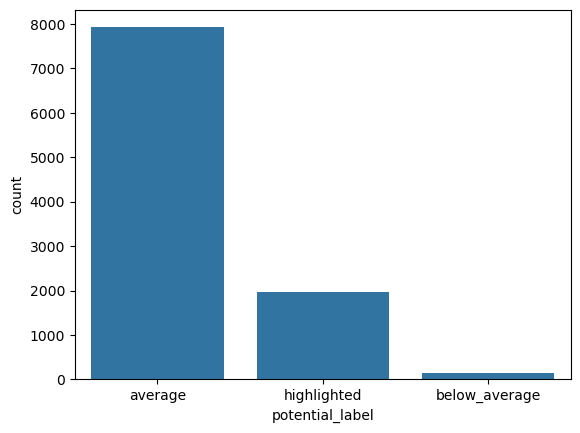

             position_id  Ratio
position_id                    
2                   1972 19.661
6                   1428 14.237
10                  1088 10.847
8                   1020 10.169
7                    986  9.831
3                    986  9.831
4                    884  8.814
9                    850  8.475
5                    816  8.136
##########################################


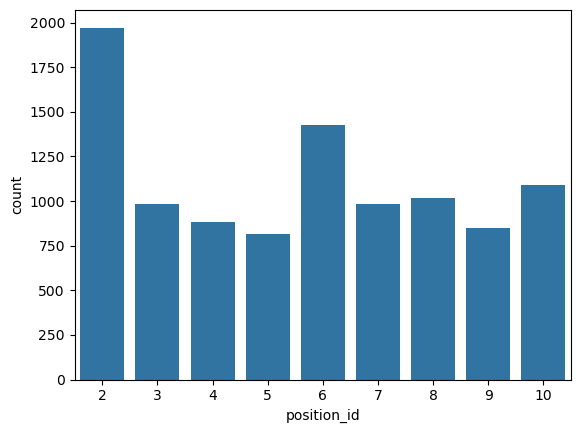

In [15]:
#Summary of Categoricals columns

cat_summary(dff, cat_cols, True)

In [16]:
# Removing the below_average class from the potential_label in the dataset. (below_average class constitutes 1% of the entire dataset)

dff = dff[dff["potential_label"] != "below_average"]

In [17]:
dff.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.000,average
1,4915,62935,177676,1361061,2,12818495,4323,56.000,average
2,4915,62935,177676,1361061,2,12818495,4324,67.000,average
3,4915,62935,177676,1361061,2,12818495,4325,56.000,average
4,4915,62935,177676,1361061,2,12818495,4326,45.000,average


In [18]:
# Creating a new table using the "pivot_table" function from the created dataset. Manipulate the created pivot table so that each row represents a player.

dff_pivot_table = pd.pivot_table(dff, values="attribute_value", columns="attribute_id", index=["player_id","position_id","potential_label"])

In [19]:
dff_pivot_table.head()

attribute_id                            4322   4323   4324   4325   4326  \
player_id position_id potential_label                                      
1355710   7           average         50.500 50.500 34.000 50.500 45.000   
1356362   9           average         67.000 67.000 67.000 67.000 67.000   
1356375   3           average         67.000 67.000 67.000 67.000 67.000   
          4           average         67.000 78.000 67.000 67.000 67.000   
1356411   9           average         67.000 67.000 78.000 78.000 67.000   

attribute_id                            4327   4328   4329   4330   4332  \
player_id position_id potential_label                                      
1355710   7           average         45.000 45.000 45.000 50.500 56.000   
1356362   9           average         67.000 67.000 67.000 67.000 67.000   
1356375   3           average         67.000 67.000 78.000 67.000 67.000   
          4           average         78.000 78.000 78.000 56.000 67.000   
1356411   9           average         67.000 67.000 67.000 89.000 78.000   

attribute_id                            4333   4335   4338   4339   4340  \
player_id position_id potential_label                                      
1355710   7           average         39.500 34.000 39.500 39.500 45.000   
1356362   9           average         67.000 67.000 67.000 67.000 67.000   
1356375   3           average         78.000 56.000 67.000 67.000 67.000   
          4           average         67.000 67.000 78.000 78.000 56.000   
1356411   9           average         67.000 67.000 67.000 56.000 56.000   

attribute_id                            4341   4342   4343   4344   4345  \
player_id position_id potential_label                                      
1355710   7           average         45.000 50.500 28.500 23.000 39.500   
1356362   9           average         67.000 67.000 67.000 56.000 67.000   
1356375   3           average         67.000 67.000 56.000 56.000 67.000   
          4           average         67.000 67.000 45.000 45.000 56.000   
1356411   9           average         67.000 78.000 56.000 56.000 67.000   

attribute_id                            4348   4349   4350   4351   4352  \
player_id position_id potential_label                                      
1355710   7           average         28.500 28.500 45.000 50.500 56.000   
1356362   9           average         67.000 56.000 67.000 67.000 67.000   
1356375   3           average         67.000 56.000 56.000 67.000 67.000   
          4           average         67.000 67.000 67.000 67.000 78.000   
1356411   9           average         56.000 67.000 56.000 67.000 67.000   

attribute_id                            4353   4354   4355   4356   4357  \
player_id position_id potential_label                                      
1355710   7           average         34.000 39.500 50.500 34.000 34.000   
1356362   9           average         67.000 78.000 67.000 67.000 67.000   
1356375   3           average         67.000 78.000 67.000 67.000 67.000   
          4           average         67.000 67.000 67.000 56.000 67.000   
1356411   9           average         56.000 67.000 67.000 56.000 67.000   

attribute_id                            4407   4408   4423   4426  
player_id position_id potential_label                              
1355710   7           average         56.000 34.000 34.000 56.000  
1356362   9           average         67.000 67.000 56.000 78.000  
1356375   3           average         67.000 67.000 56.000 78.000  
          4           average         56.000 67.000 45.000 56.000  
1356411   9           average         89.000 56.000 67.000 78.000

In [20]:
# Using the “reset_index” function to avoid index errors and converting “attribute_id” column names to strings using (df.columns.map(str)).

dff_pivot_table = dff_pivot_table.reset_index(drop=False)

In [21]:
dff_pivot_table.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.500,50.500,34.000,50.500,45.000,45.000,45.000,45.000,50.500,56.000,39.500,34.000,39.500,39.500,45.000,45.000,50.500,28.500,23.000,39.500,28.500,28.500,45.000,50.500,56.000,34.000,39.500,50.500,34.000,34.000,56.000,34.000,34.000,56.000
1,1356362,9,average,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
2,1356375,3,average,67.000,67.000,67.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,78.000,56.000,67.000,67.000,67.000,67.000,67.000,56.000,56.000,67.000,67.000,56.000,56.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
3,1356375,4,average,67.000,78.000,67.000,67.000,67.000,78.000,78.000,78.000,56.000,67.000,67.000,67.000,78.000,78.000,56.000,67.000,67.000,45.000,45.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,56.000,67.000,56.000,67.000,45.000,56.000
4,1356411,9,average,67.000,67.000,78.000,78.000,67.000,67.000,67.000,67.000,89.000,78.000,67.000,67.000,67.000,56.000,56.000,67.000,78.000,56.000,56.000,67.000,56.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,89.000,56.000,67.000,78.000


In [22]:
dff_pivot_table.columns = dff_pivot_table.columns.map(str)

In [23]:
dff_pivot_table.head()

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,average,50.500,50.500,34.000,50.500,45.000,45.000,45.000,45.000,50.500,56.000,39.500,34.000,39.500,39.500,45.000,45.000,50.500,28.500,23.000,39.500,28.500,28.500,45.000,50.500,56.000,34.000,39.500,50.500,34.000,34.000,56.000,34.000,34.000,56.000
1,1356362,9,average,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
2,1356375,3,average,67.000,67.000,67.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,78.000,56.000,67.000,67.000,67.000,67.000,67.000,56.000,56.000,67.000,67.000,56.000,56.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
3,1356375,4,average,67.000,78.000,67.000,67.000,67.000,78.000,78.000,78.000,56.000,67.000,67.000,67.000,78.000,78.000,56.000,67.000,67.000,45.000,45.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,56.000,67.000,56.000,67.000,45.000,56.000
4,1356411,9,average,67.000,67.000,78.000,78.000,67.000,67.000,67.000,67.000,89.000,78.000,67.000,67.000,67.000,56.000,56.000,67.000,78.000,56.000,56.000,67.000,56.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,89.000,56.000,67.000,78.000


#### 2.2.) Analysis of Numerical Variables

In [24]:
# Execute the function to identify and separate variable types.

num_cols = dff_pivot_table.columns[3:]
num_cols

Index(['4322', '4323', '4324', '4325', '4326', '4327', '4328', '4329', '4330',
       '4332', '4333', '4335', '4338', '4339', '4340', '4341', '4342', '4343',
       '4344', '4345', '4348', '4349', '4350', '4351', '4352', '4353', '4354',
       '4355', '4356', '4357', '4407', '4408', '4423', '4426'],
      dtype='object', name='attribute_id')

count   271.000
mean     58.368
std      14.527
min      23.000
5%       34.000
10%      34.000
20%      45.000
30%      56.000
40%      56.000
50%      56.000
60%      67.000
70%      67.000
80%      67.000
90%      78.000
95%      78.000
99%      78.000
max      89.000
Name: 4322, dtype: float64
count   271.000
mean     58.740
std      14.757
min      23.000
5%       34.000
10%      34.000
20%      45.000
30%      45.000
40%      56.000
50%      56.000
60%      67.000
70%      67.000
80%      72.500
90%      78.000
95%      78.000
99%      78.000
max      89.000
Name: 4323, dtype: float64
count   271.000
mean     56.250
std      15.868
min      23.000
5%       34.000
10%      34.000
20%      34.000
30%      45.000
40%      56.000
50%      56.000
60%      67.000
70%      67.000
80%      67.000
90%      78.000
95%      78.000
99%      78.000
max      78.000
Name: 4324, dtype: float64
count   271.000
mean     56.947
std      14.749
min      12.000
5%       34.000
10%      34.000
20%    

C:\Users\KAZIM BEKTAS\AppData\Local\Temp\ipykernel_4804\2772740939.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(12, 6))


count   271.000
mean     45.237
std      16.095
min      12.000
5%       23.000
10%      23.000
20%      23.000
30%      34.000
40%      45.000
50%      45.000
60%      56.000
70%      56.000
80%      56.000
90%      67.000
95%      67.000
99%      78.000
max      89.000
Name: 4349, dtype: float64
count   271.000
mean     54.897
std      14.303
min      12.000
5%       34.000
10%      34.000
20%      45.000
30%      45.000
40%      56.000
50%      56.000
60%      67.000
70%      67.000
80%      67.000
90%      67.000
95%      67.000
99%      78.000
max      78.000
Name: 4350, dtype: float64
count   271.000
mean     56.737
std      14.344
min      12.000
5%       34.000
10%      34.000
20%      45.000
30%      45.000
40%      56.000
50%      56.000
60%      67.000
70%      67.000
80%      67.000
90%      67.000
95%      78.000
99%      78.000
max     100.000
Name: 4351, dtype: float64
count   271.000
mean     55.817
std      14.243
min      12.000
5%       34.000
10%      34.000
20%    

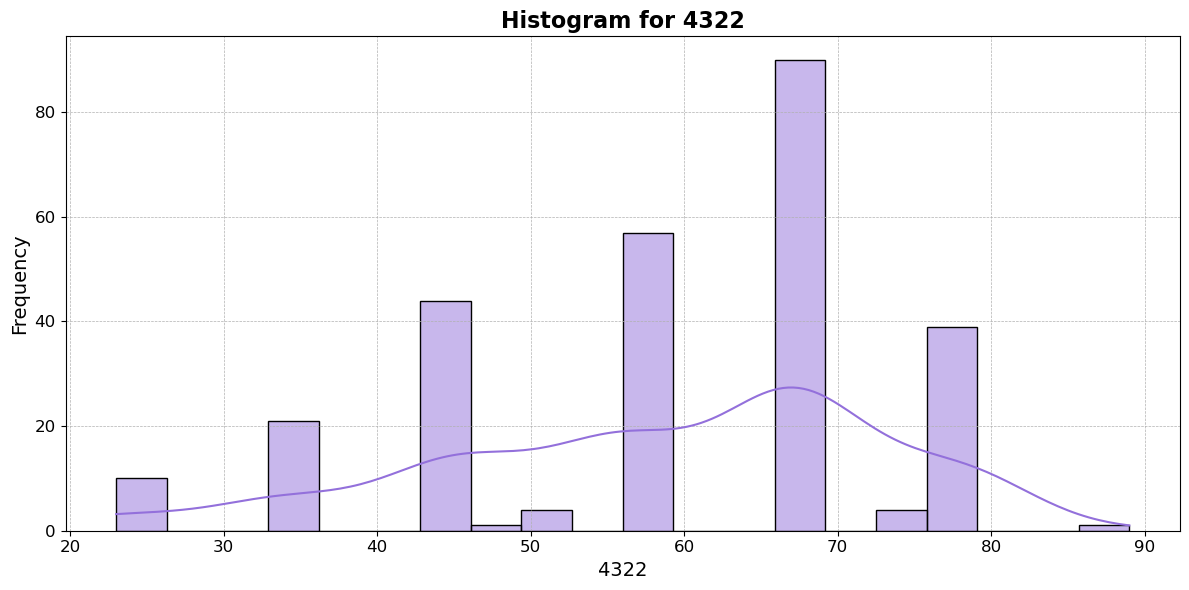

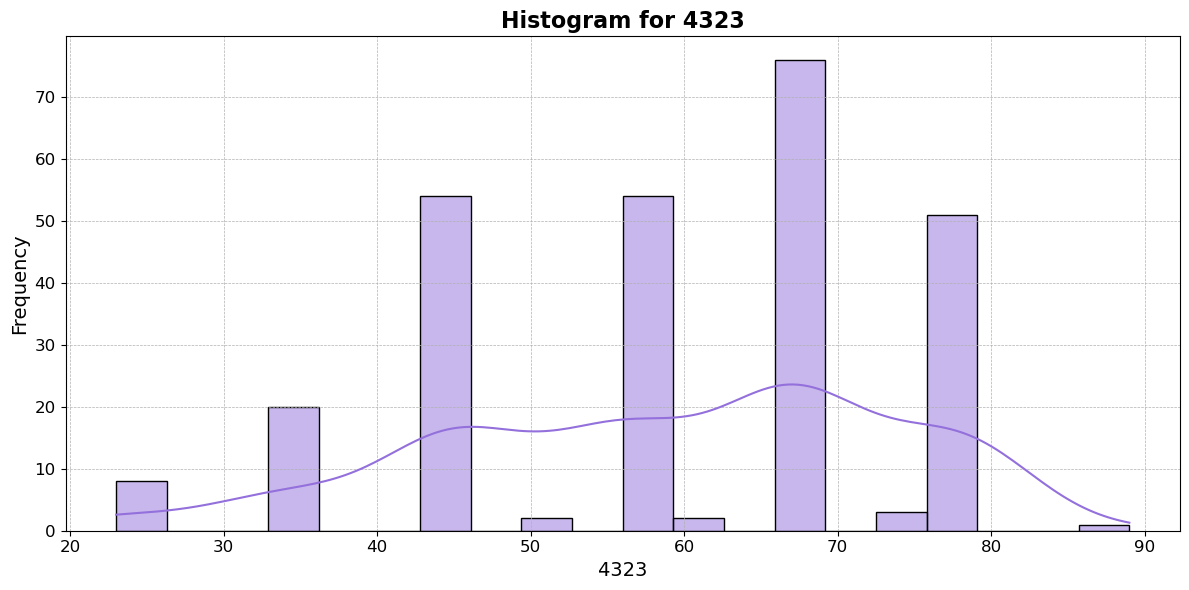

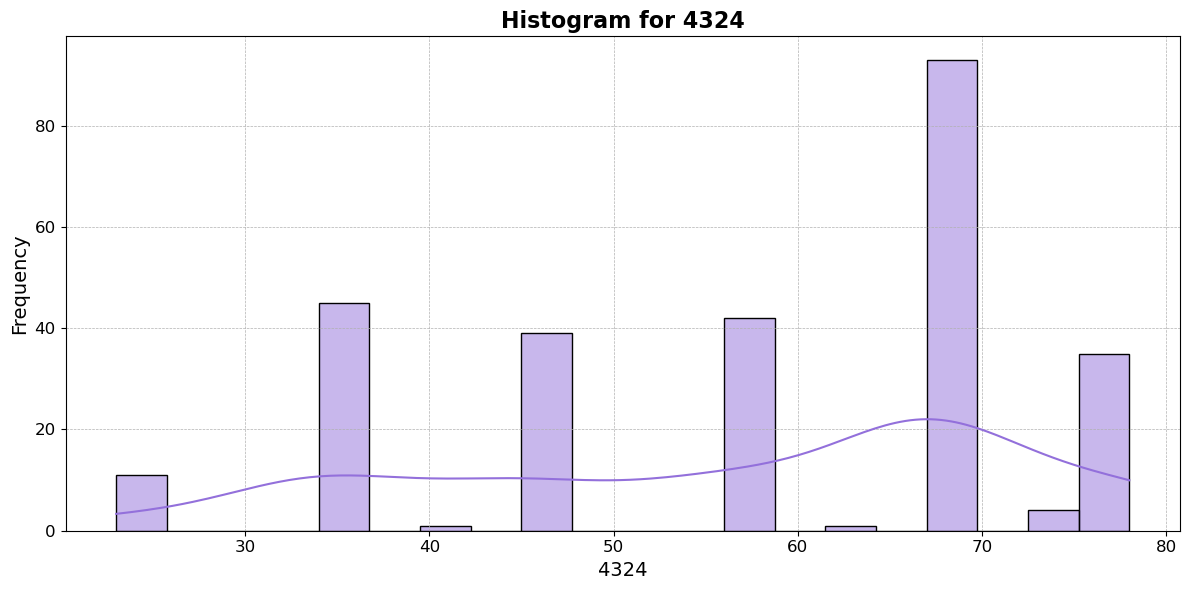

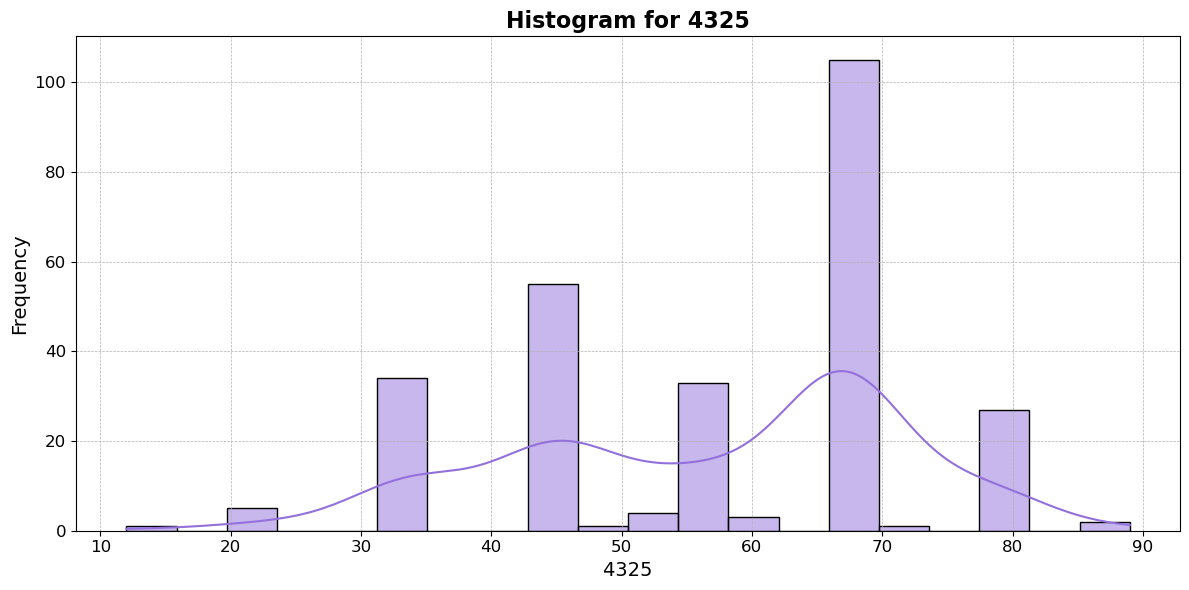

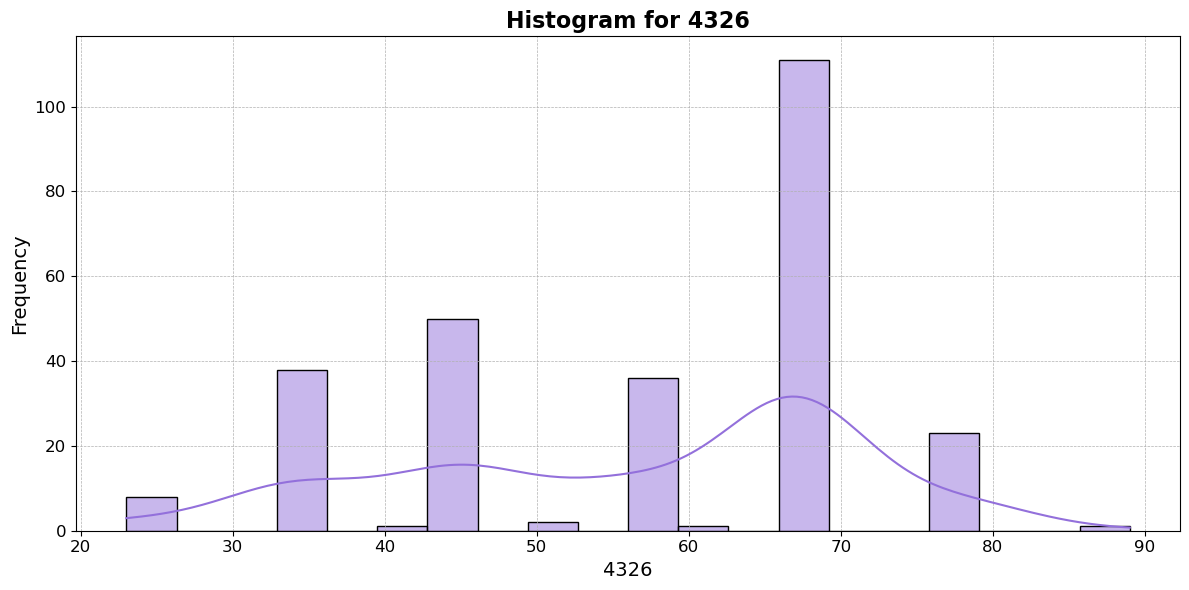

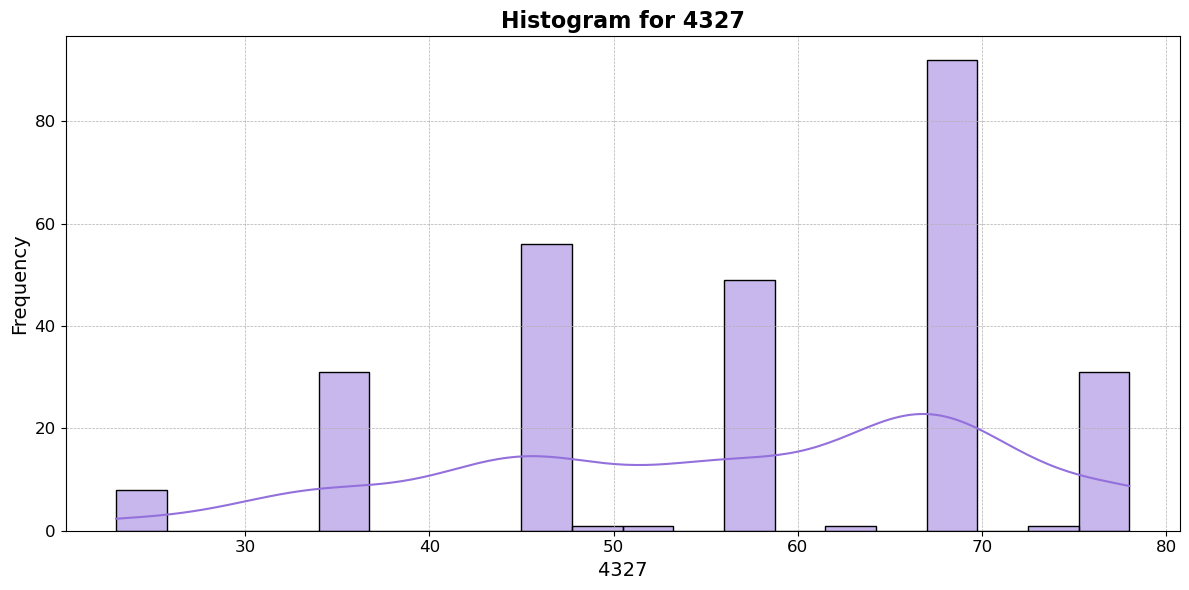

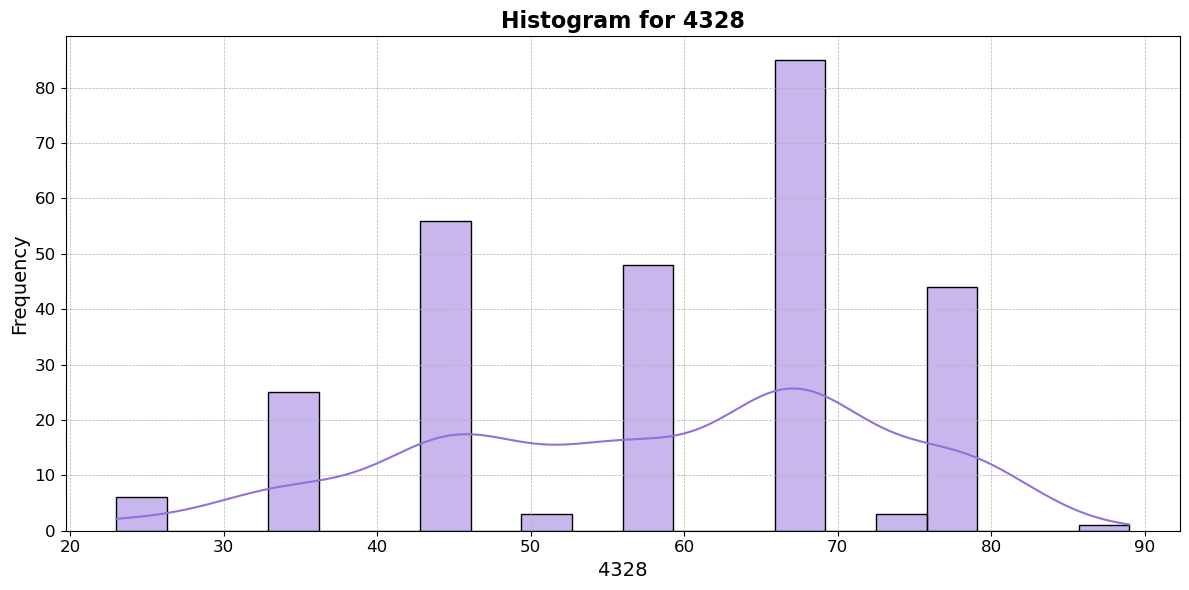

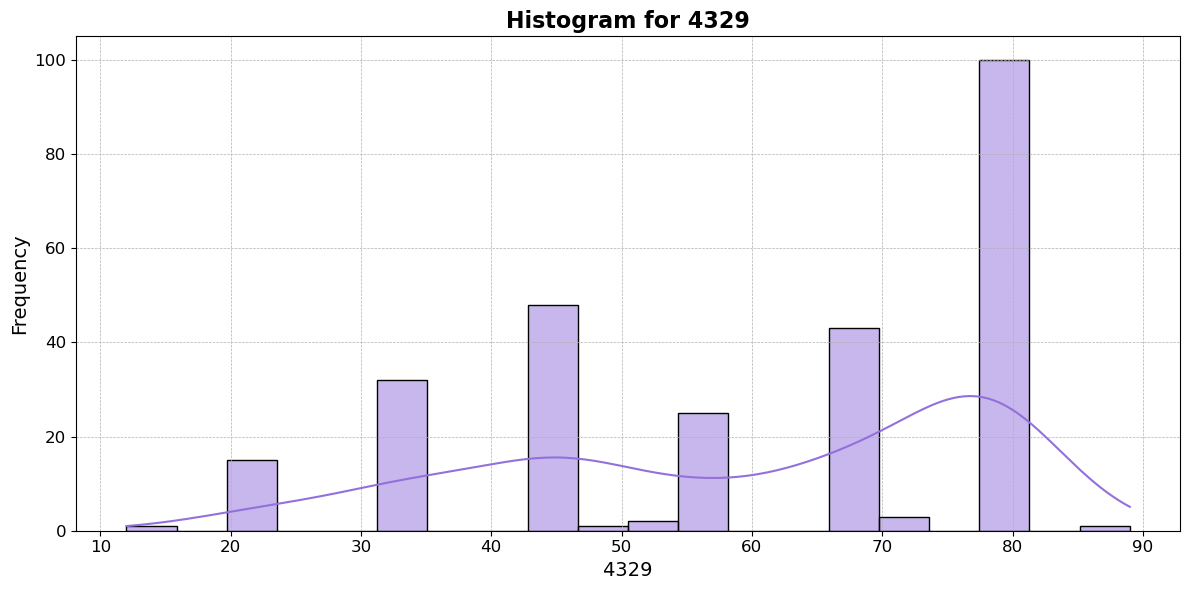

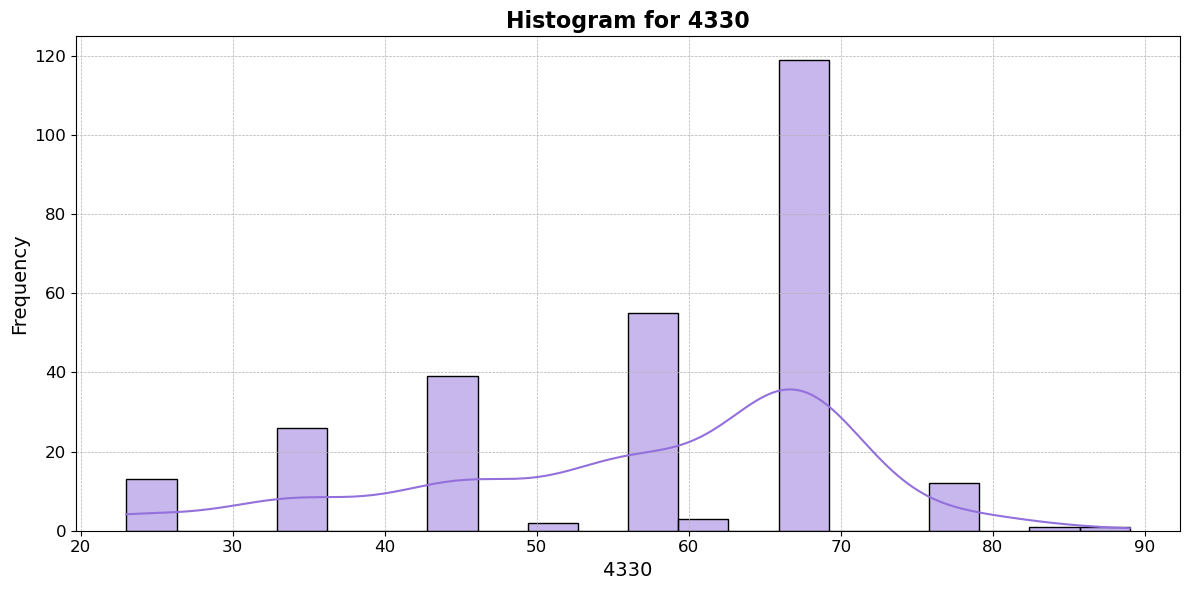

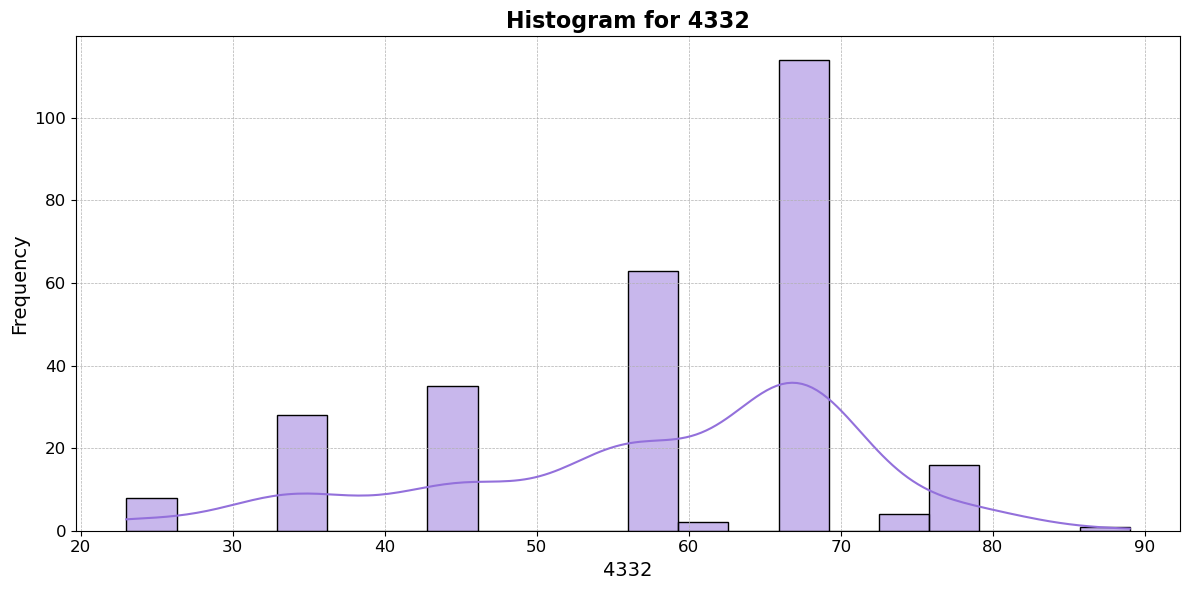

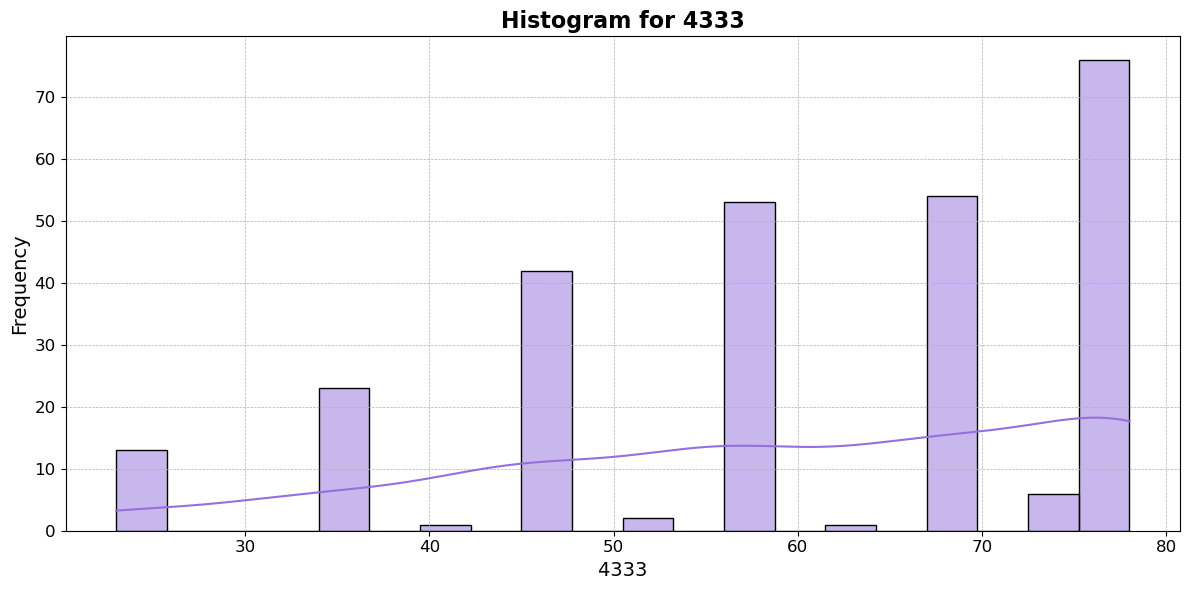

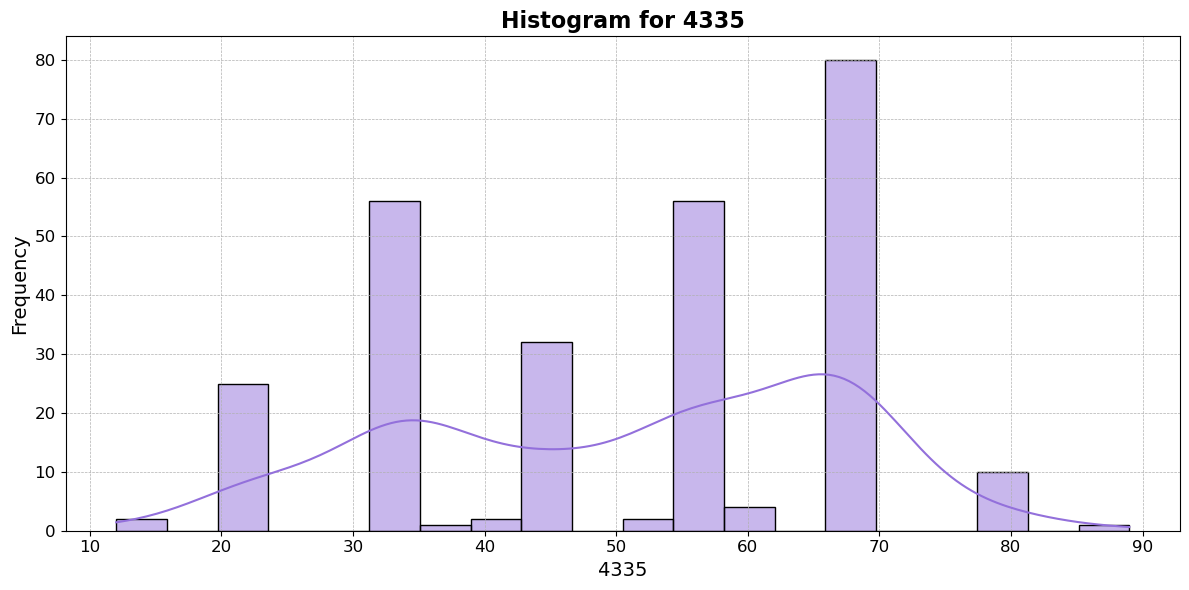

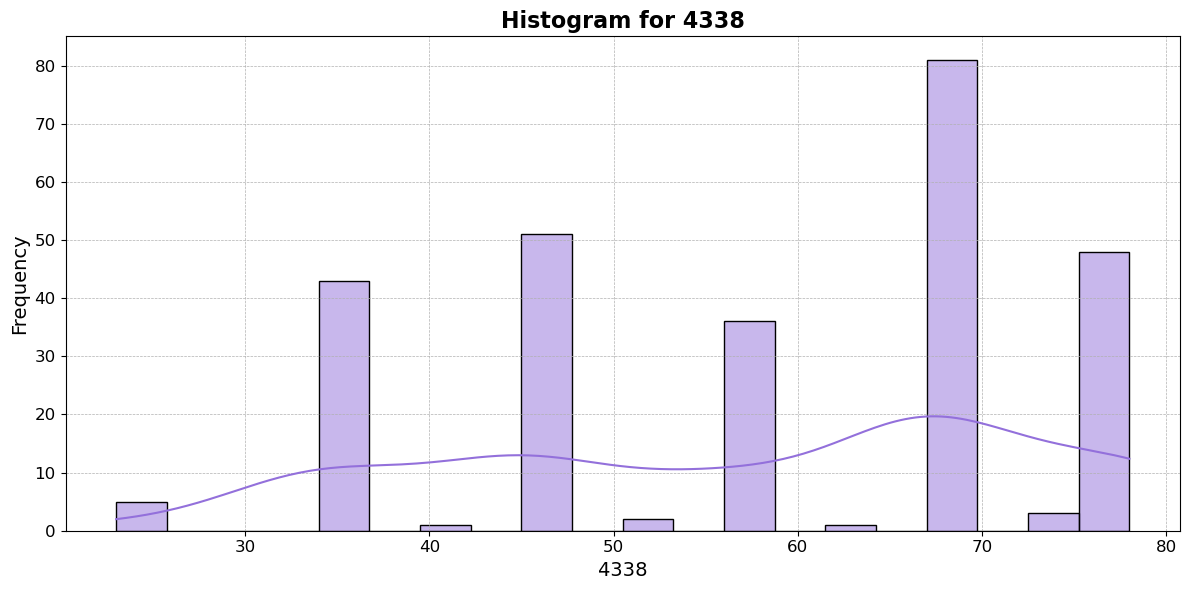

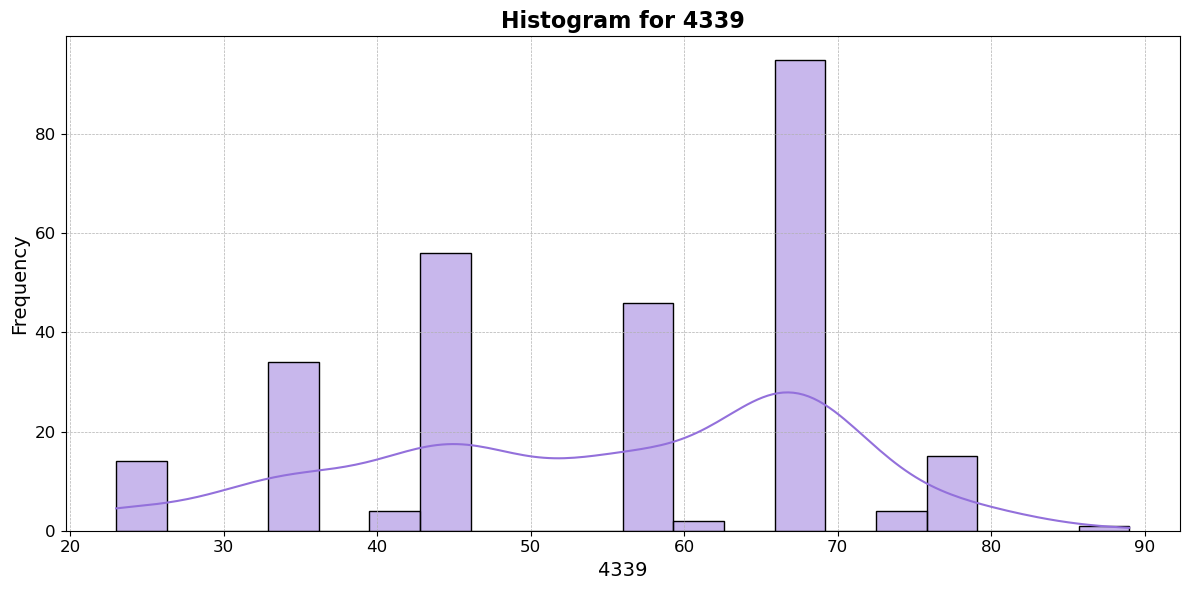

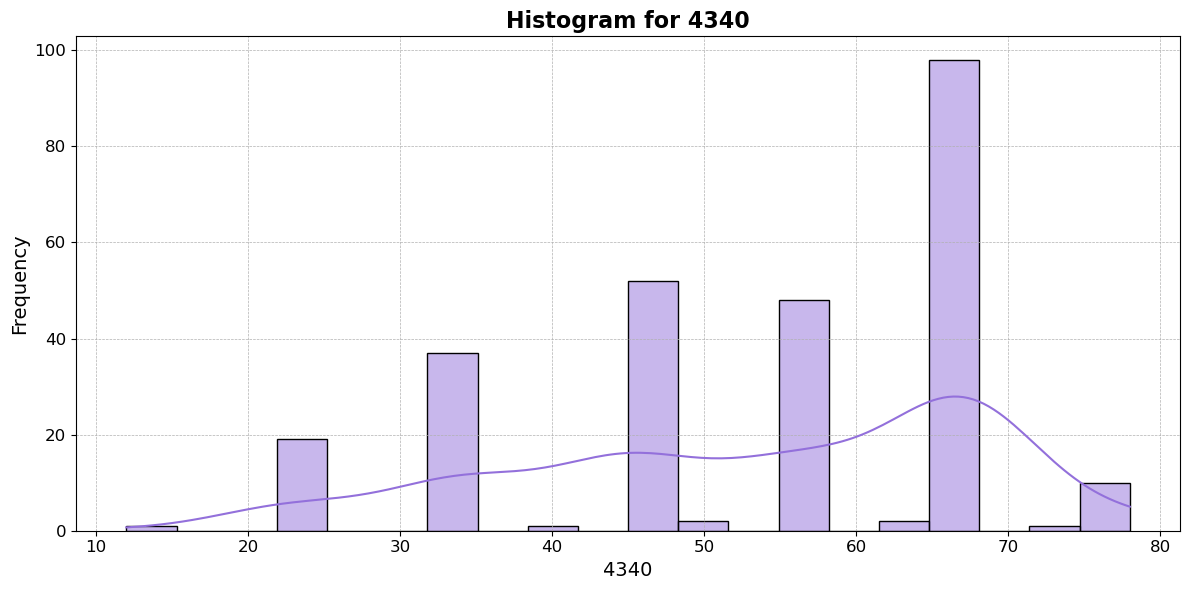

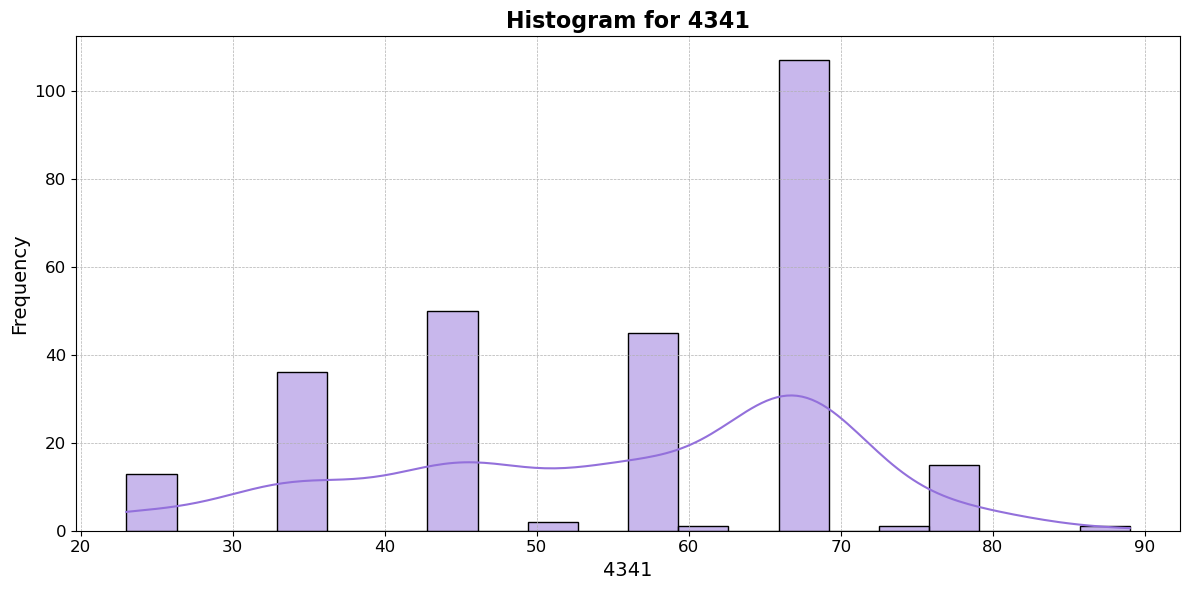

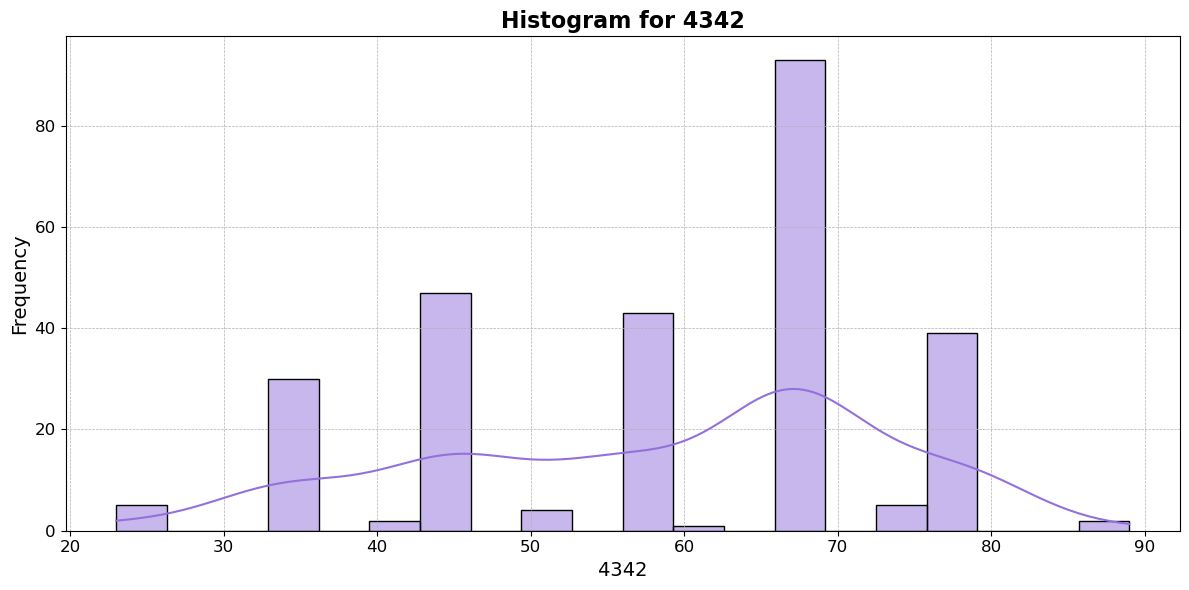

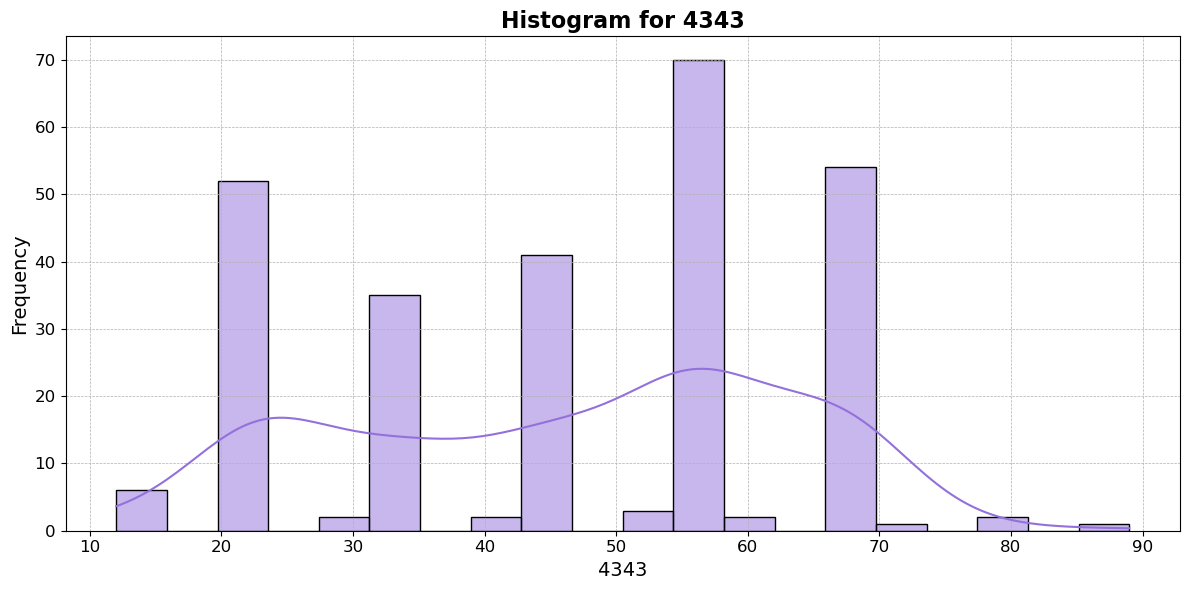

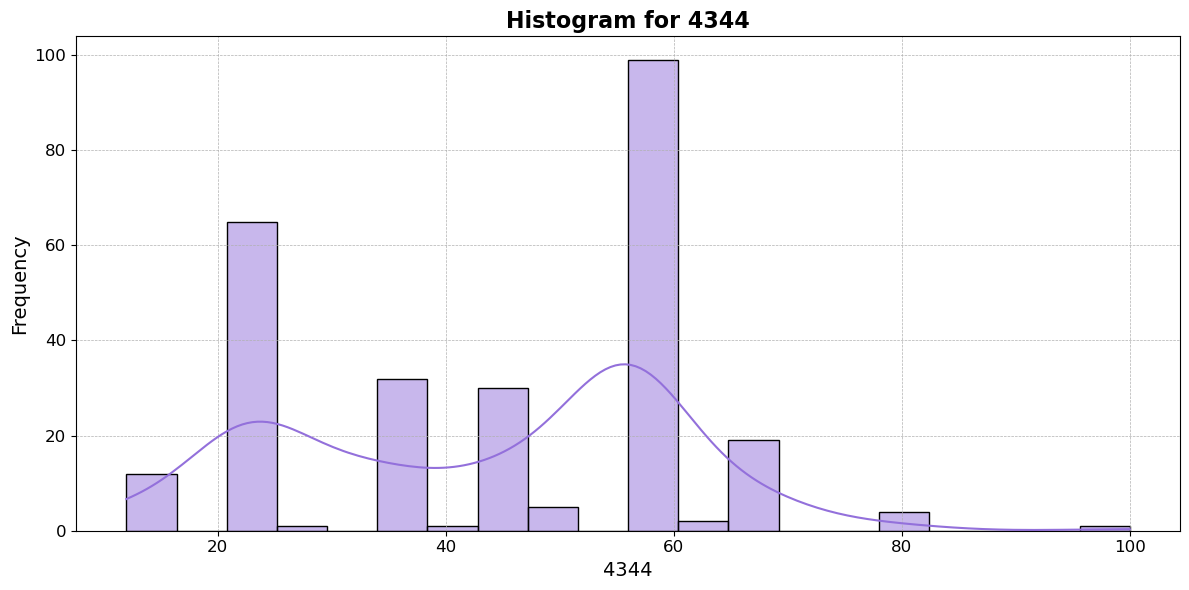

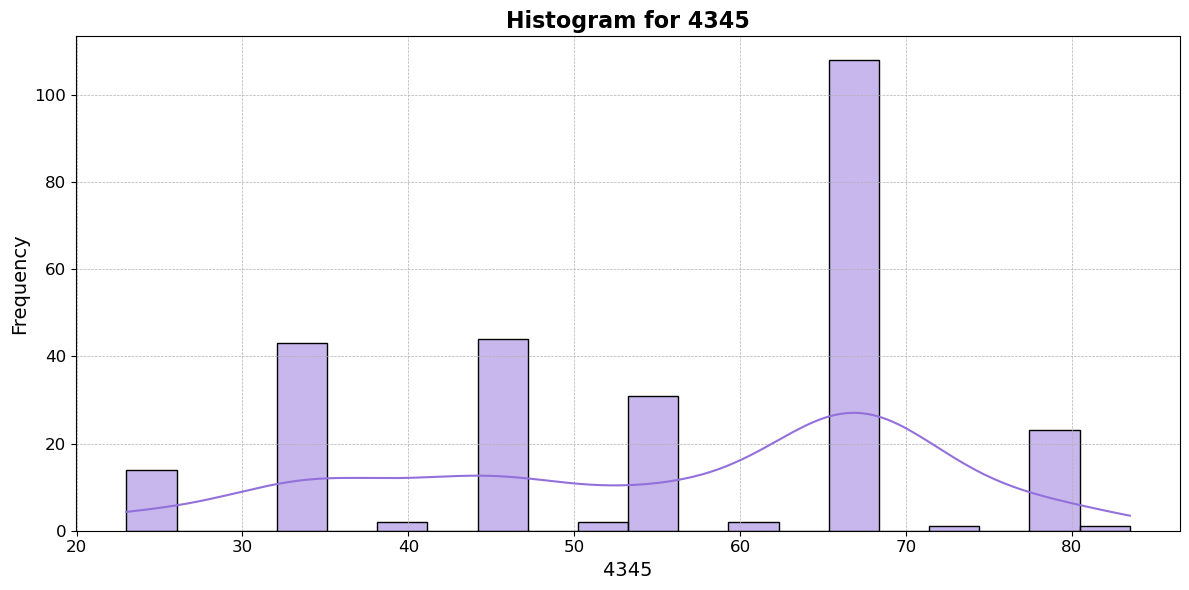

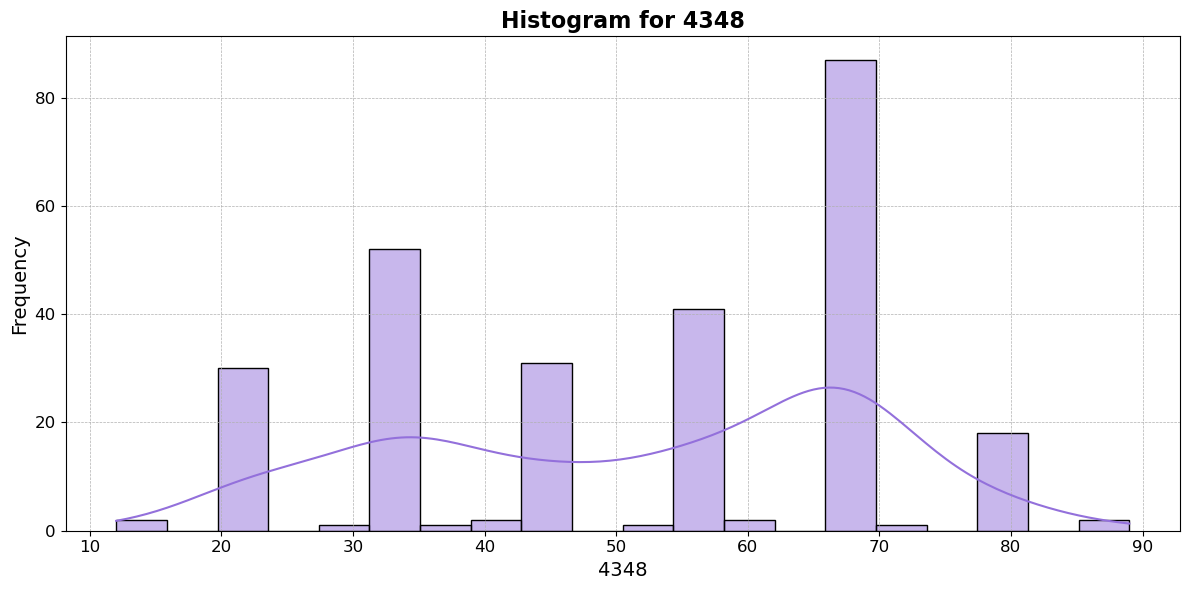

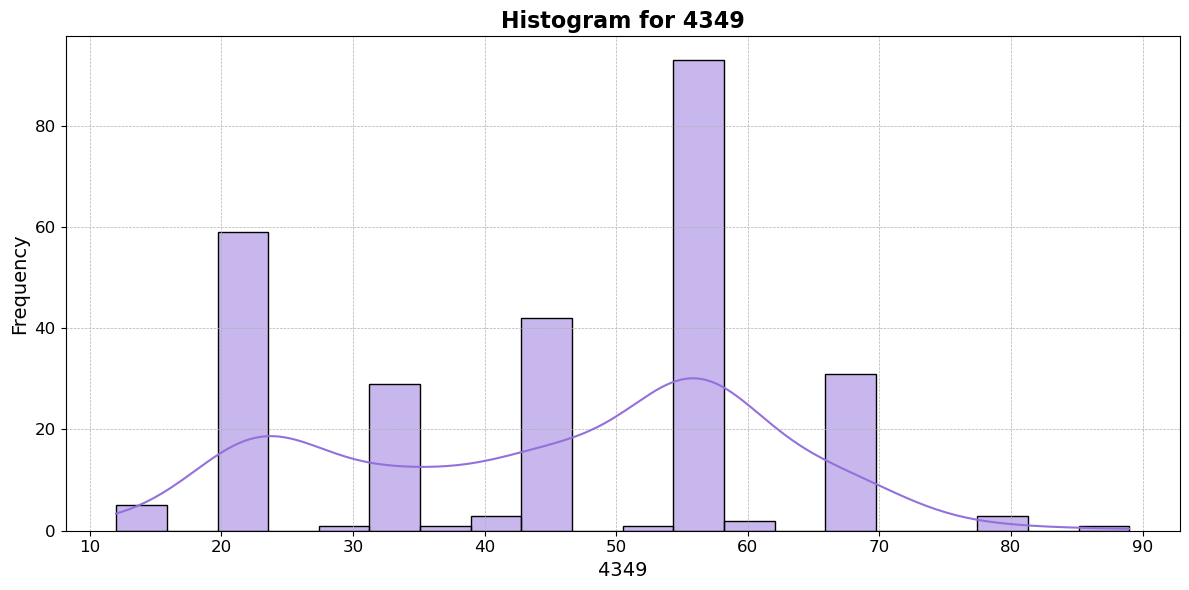

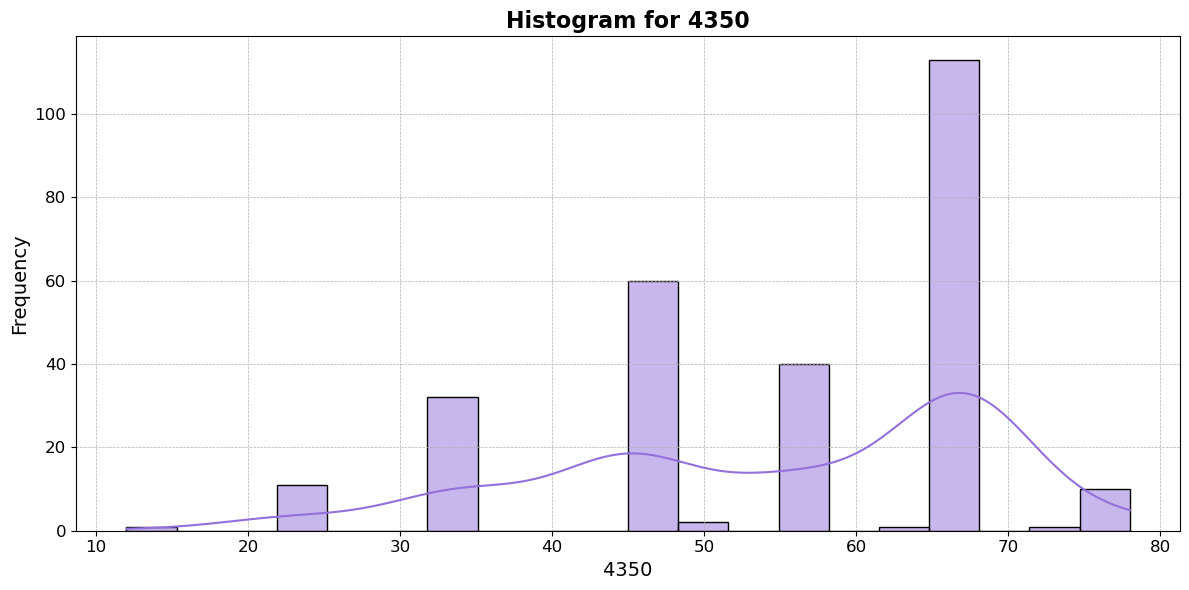

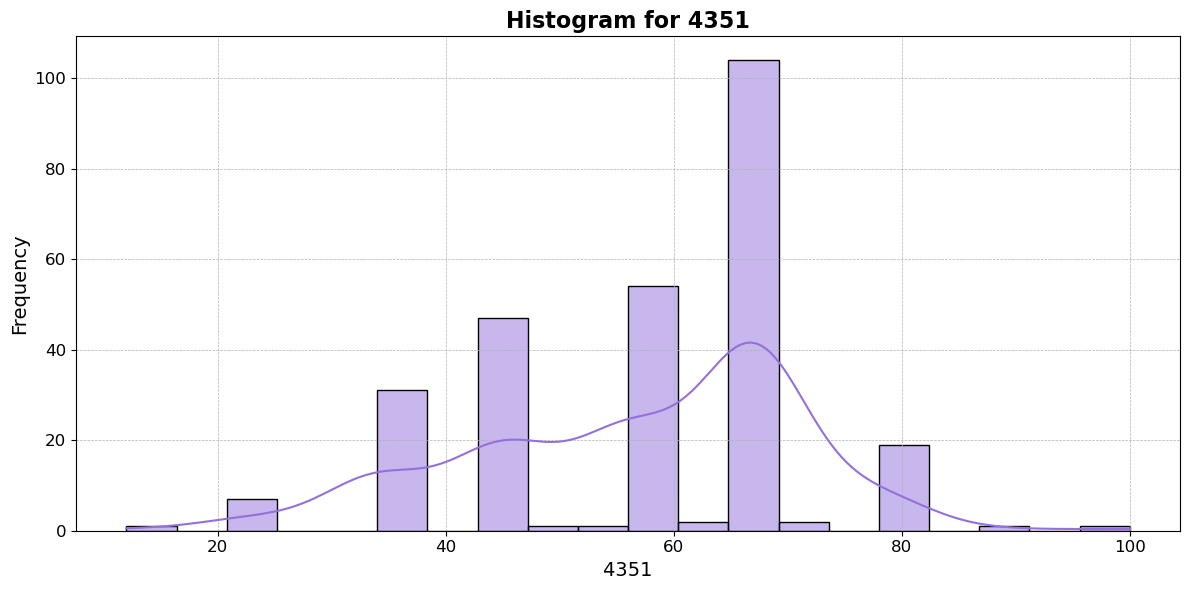

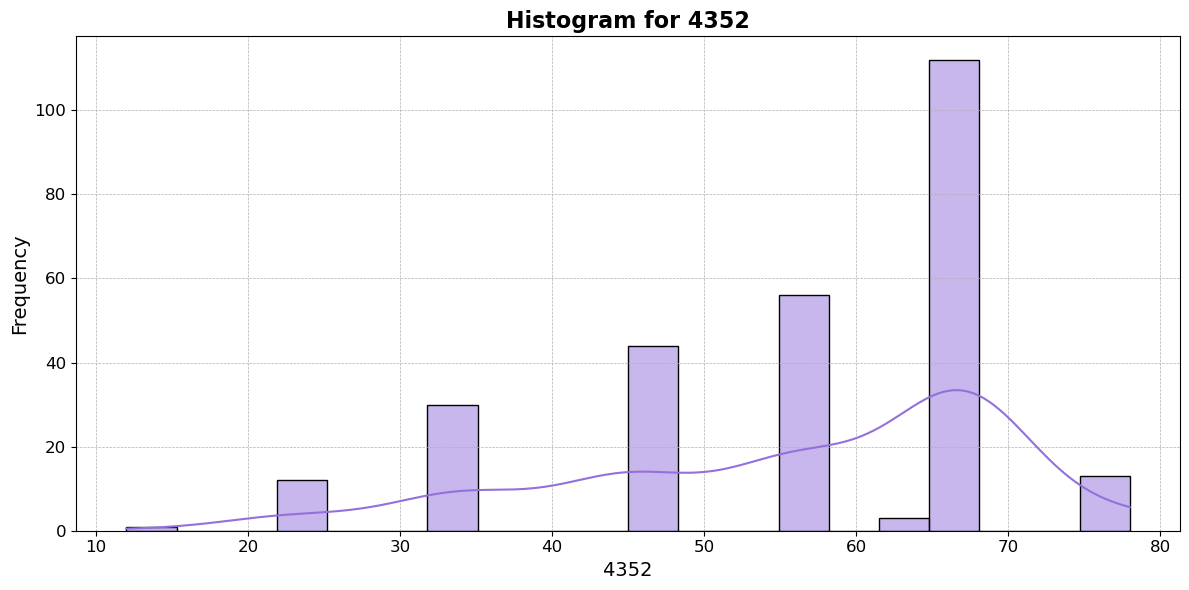

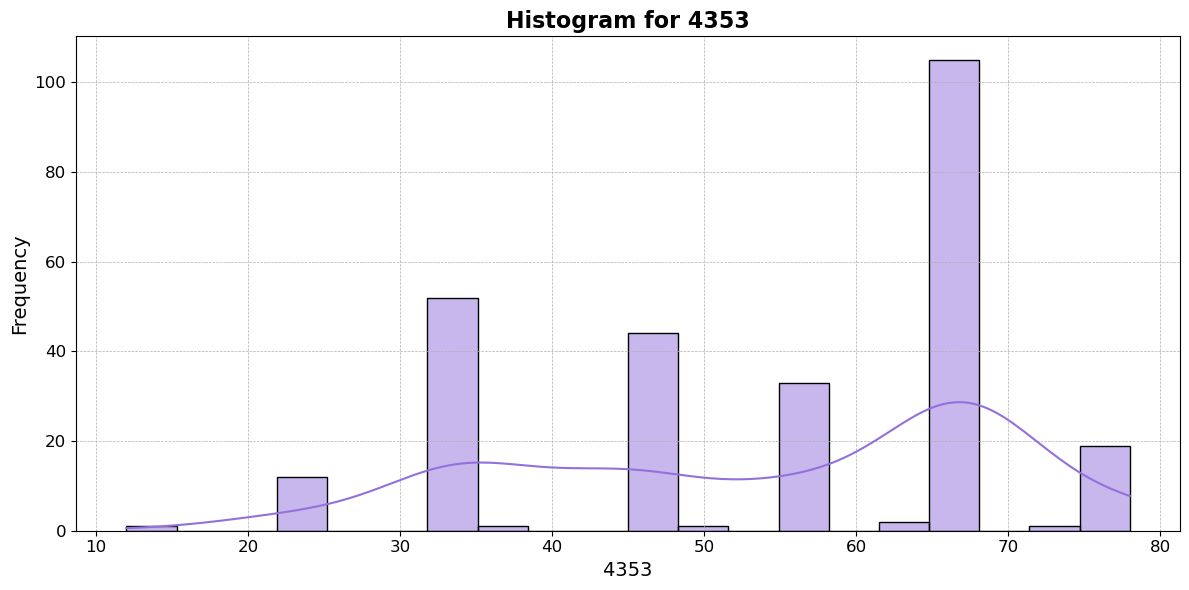

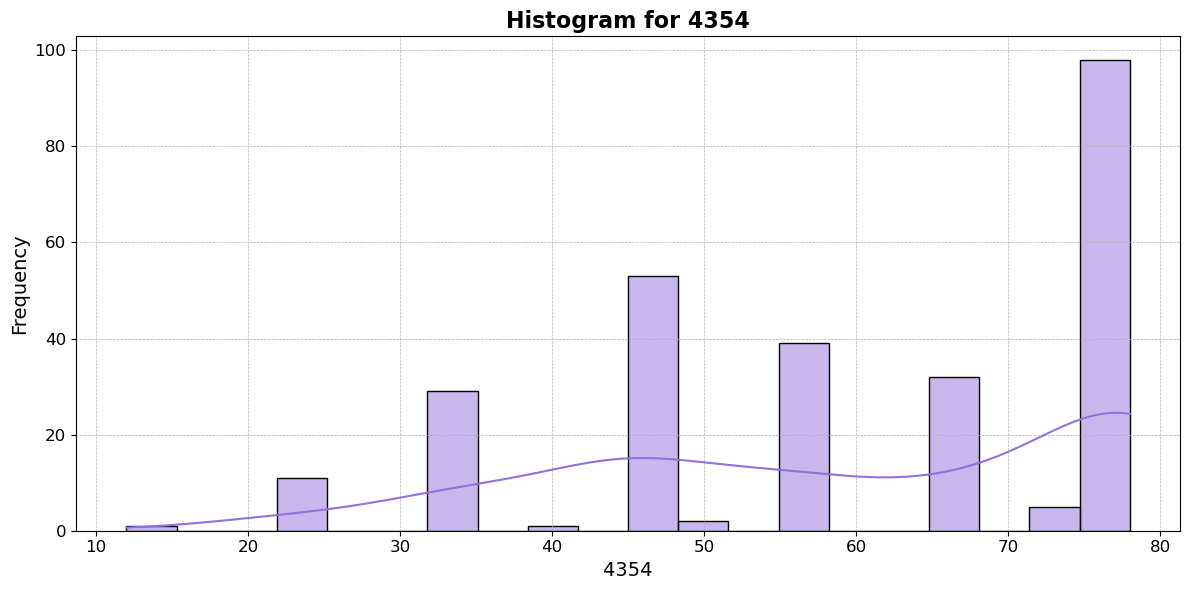

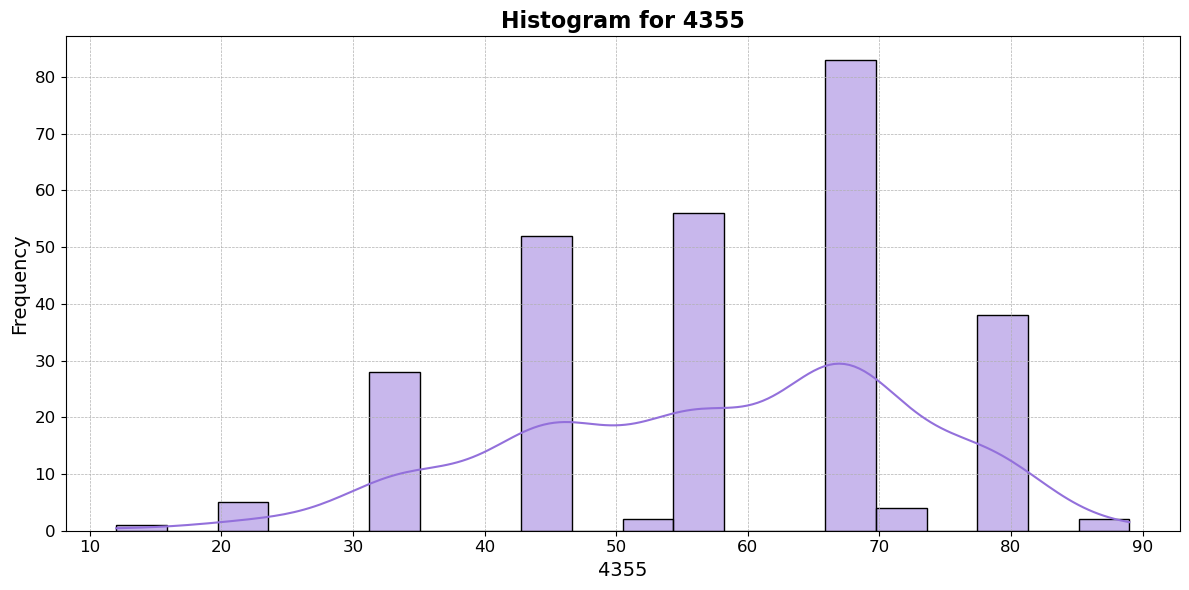

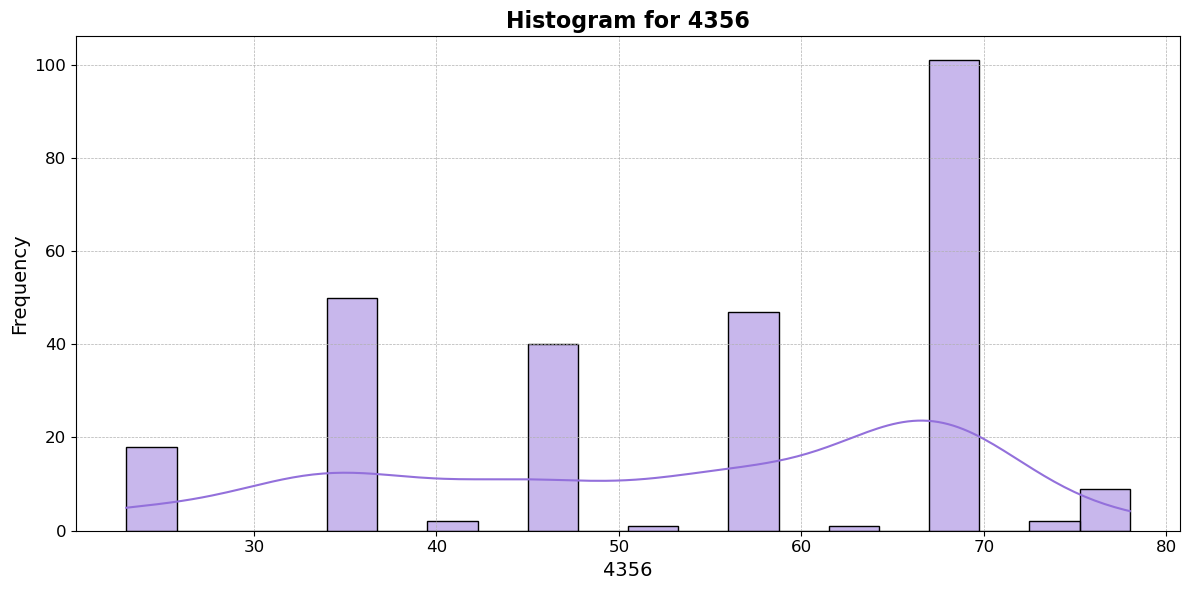

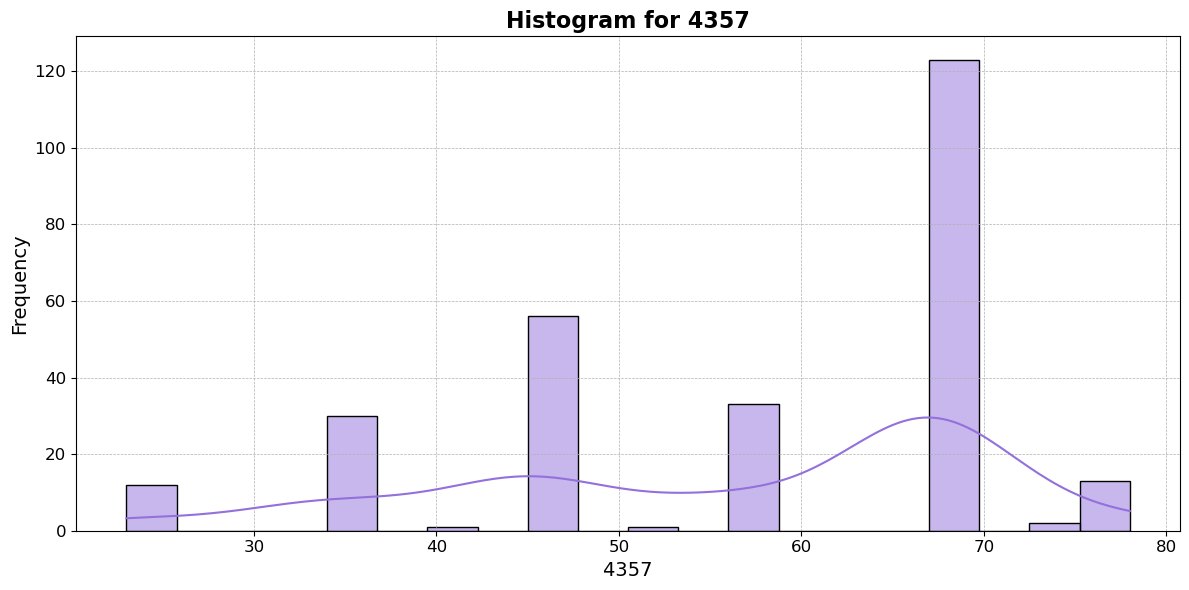

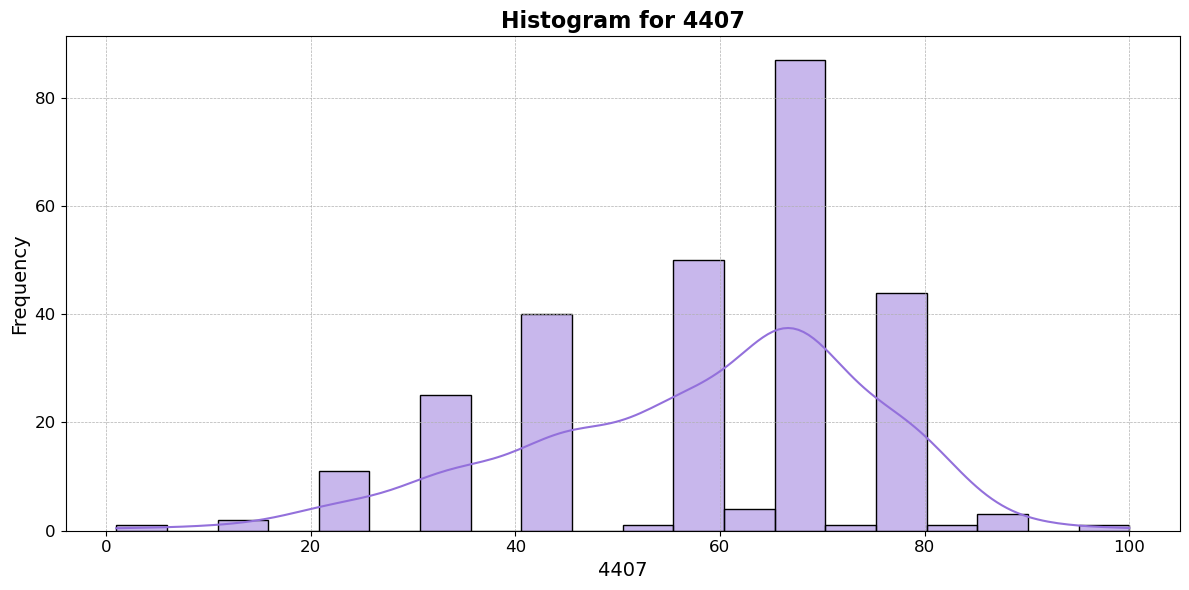

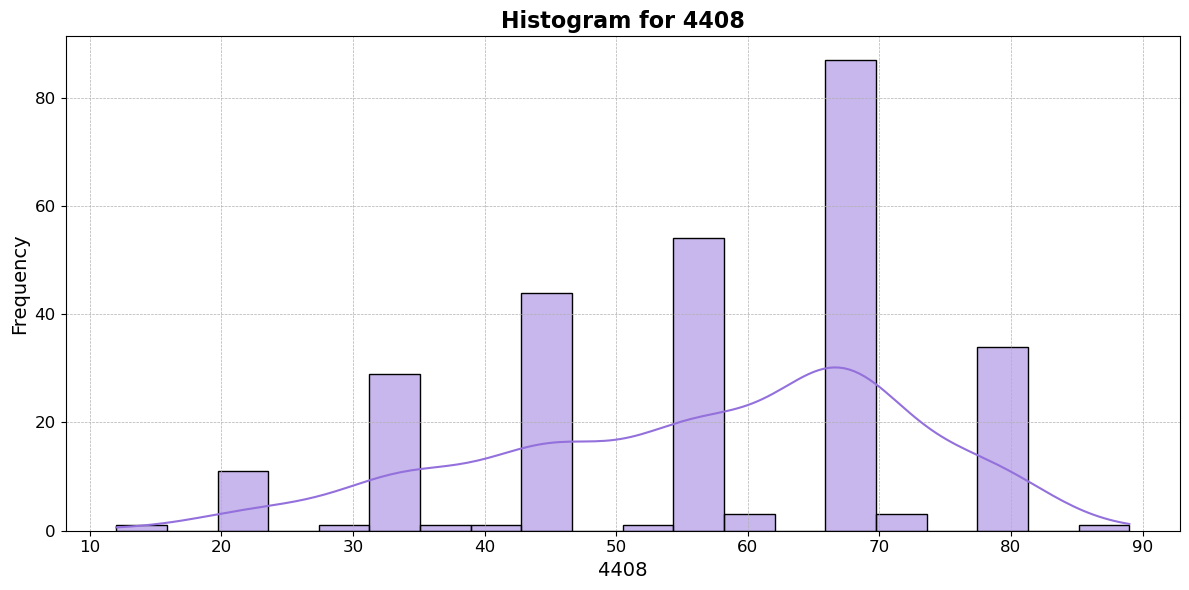

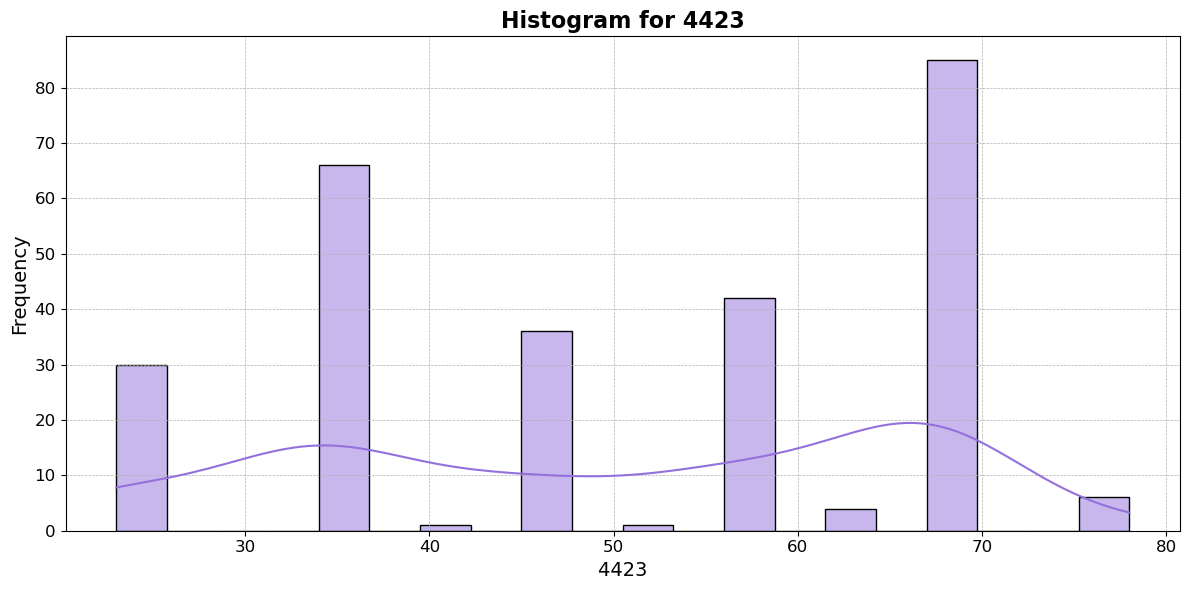

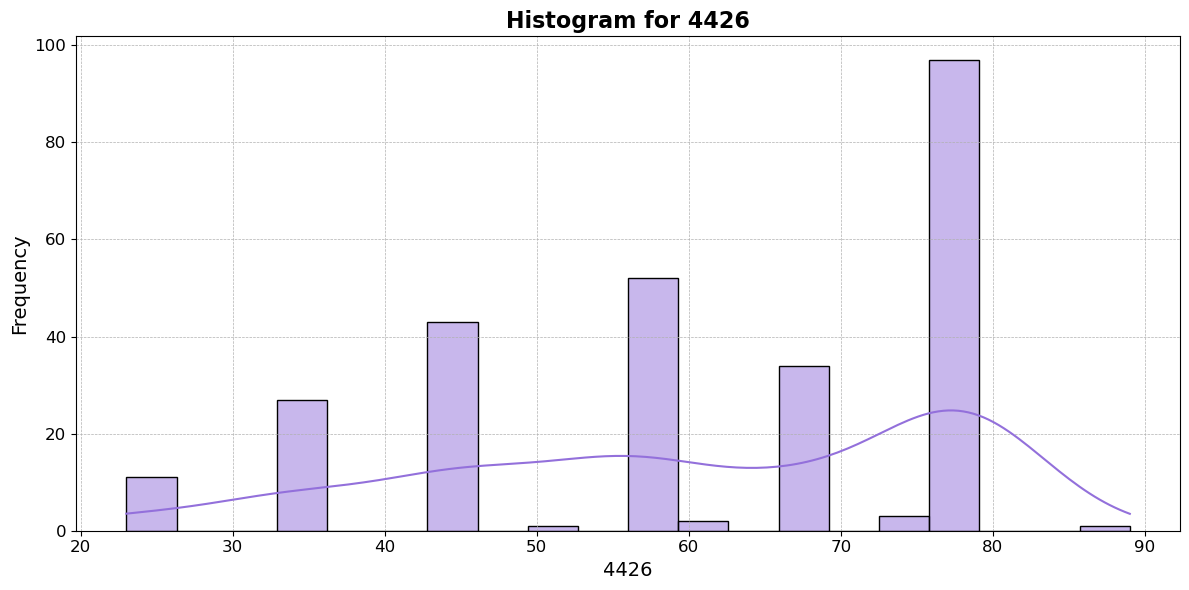

In [27]:
#Summary of Numericals columns
def num_summary(dataframe, col, groupby=None, log_scale=False, ax=None):
    """
    Plot histogram(s) for a column in a dataframe, optionally grouped by another column.

    Parameters:
    ----------
    dataframe : DataFrame
        The dataframe containing the data to plot.
    col : str
        Name of the column for which to plot the histogram.
    groupby : str or None, optional
        Name of the column by which to group the data. Default is None.
    log_scale : bool, optional
        Whether to use a logarithmic scale on the y-axis. Default is False.
    ax : matplotlib Axes object, optional
        Axes object to plot on. If None, a new figure and axes will be created. Default is None.

    Returns:
    -------
    None
    """
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[col].describe(quantiles).T)

    
    # Set up the figure and axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    
    # Set seaborn color palette for colorblind accessibility and distinct colors
    sns.set_palette(sns.color_palette("viridis"))
    
    # Plot histogram with or without grouping
    if groupby is not None:
        sns.histplot(data=dataframe, x=col, bins=20, kde=True, hue=groupby, palette="viridis", ax=ax)
    else:
        sns.histplot(data=dataframe, x=col, bins=20, kde=True, color='mediumpurple', ax=ax)
    
    # Set plot labels and title
    ax.set_title(f'Histogram for {col}', fontsize=16, weight='bold')
    ax.set_xlabel(col, fontsize=14)
    ax.set_ylabel('Frequency', fontsize=14)
    
    # Set y-axis to log scale if log_scale is True
    if log_scale:
        ax.set_yscale('log')
    
    # Enhance grid and ticks for better readability
    ax.grid(True, linestyle='--', linewidth=0.5)
    ax.tick_params(axis='both', labelsize=12)

    # Adjust layout for better spacing
    plt.tight_layout()



for col in num_cols:
    num_summary(dff_pivot_table, col)

#### 2.3 )Analysis of Numerical Variables by Target

In [28]:
 # This function calculates and prints the mean of a numerical column, grouped by the target variable.

def target_summary_with_num(dataframe, target, numerical_col):
    
    # Group the dataframe by the target variable and calculate the mean of the numerical column for each group.
    # The .agg() method is used to apply the mean function to the specified numerical column.
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

# Iterate over each numerical column in the list of numerical columns.
for col in num_cols:
    # Call the target_summary_with_num function for each numerical column to print the mean values grouped by the target.
    target_summary_with_num(dff_pivot_table, "potential_label", col)

attribute_id      4322
potential_label       
average         57.143
highlighted     63.071


attribute_id      4323
potential_label       
average         57.867
highlighted     62.089


attribute_id      4324
potential_label       
average         55.343
highlighted     59.732


attribute_id      4325
potential_label       
average         54.559
highlighted     66.116


attribute_id      4326
potential_label       
average         54.209
highlighted     64.446


attribute_id      4327
potential_label       
average         55.736
highlighted     59.536


attribute_id      4328
potential_label       
average         57.433
highlighted     61.304


attribute_id      4329
potential_label       
average         59.240
highlighted     60.812


attribute_id      4330
potential_label       
average         55.872
highlighted     60.223


attribute_id      4332
potential_label       
average         56.836
highlighted     60.812


attribute_id      4333
potential_label       
average       

#### 2.4 )Correlation Analysis

In [29]:
# Display the correlation matrix for numerical variables.

dff_pivot_table[num_cols].corr()

attribute_id,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
attribute_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4322,1.000,0.877,0.803,0.801,0.815,0.830,0.841,0.772,0.730,0.785,0.815,0.698,0.837,0.778,0.710,0.743,0.815,0.682,0.666,0.726,0.755,0.687,0.818,0.844,0.838,0.837,0.818,0.852,0.761,0.827,0.707,0.707,0.747,0.776
4323,0.877,1.000,0.853,0.799,0.782,0.844,0.864,0.774,0.787,0.810,0.829,0.713,0.816,0.807,0.752,0.747,0.796,0.679,0.694,0.777,0.803,0.716,0.832,0.819,0.860,0.850,0.869,0.886,0.786,0.834,0.724,0.747,0.766,0.819
4324,0.803,0.853,1.000,0.782,0.779,0.781,0.850,0.769,0.809,0.809,0.802,0.715,0.798,0.765,0.707,0.743,0.777,0.707,0.723,0.813,0.777,0.743,0.787,0.793,0.787,0.831,0.881,0.824,0.779,0.851,0.747,0.759,0.790,0.788
4325,0.801,0.799,0.782,1.000,0.887,0.813,0.804,0.671,0.823,0.818,0.751,0.668,0.880,0.688,0.787,0.864,0.853,0.787,0.790,0.854,0.662,0.785,0.849,0.800,0.841,0.841,0.801,0.801,0.748,0.769,0.788,0.648,0.793,0.838
4326,0.815,0.782,0.779,0.887,1.000,0.846,0.834,0.697,0.729,0.750,0.750,0.641,0.876,0.717,0.758,0.820,0.863,0.740,0.734,0.814,0.689,0.758,0.852,0.821,0.808,0.841,0.816,0.783,0.708,0.760,0.747,0.674,0.793,0.759
4327,0.830,0.844,0.781,0.813,0.846,1.000,0.894,0.761,0.719,0.740,0.793,0.707,0.829,0.744,0.745,0.747,0.813,0.671,0.684,0.761,0.753,0.745,0.857,0.794,0.819,0.833,0.826,0.832,0.760,0.791,0.710,0.709,0.766,0.758
4328,0.841,0.864,0.850,0.804,0.834,0.894,1.000,0.790,0.766,0.782,0.815,0.714,0.848,0.773,0.722,0.752,0.823,0.690,0.712,0.789,0.764,0.723,0.832,0.827,0.806,0.831,0.866,0.834,0.778,0.842,0.711,0.758,0.792,0.775
4329,0.772,0.774,0.769,0.671,0.697,0.761,0.790,1.000,0.627,0.640,0.861,0.857,0.748,0.756,0.632,0.614,0.699,0.684,0.697,0.693,0.778,0.681,0.718,0.717,0.732,0.746,0.813,0.795,0.847,0.849,0.648,0.753,0.750,0.696
4330,0.730,0.787,0.809,0.823,0.729,0.719,0.766,0.627,1.000,0.910,0.737,0.567,0.784,0.626,0.772,0.824,0.753,0.755,0.766,0.850,0.616,0.715,0.776,0.756,0.762,0.741,0.786,0.773,0.701,0.738,0.804,0.605,0.738,0.912


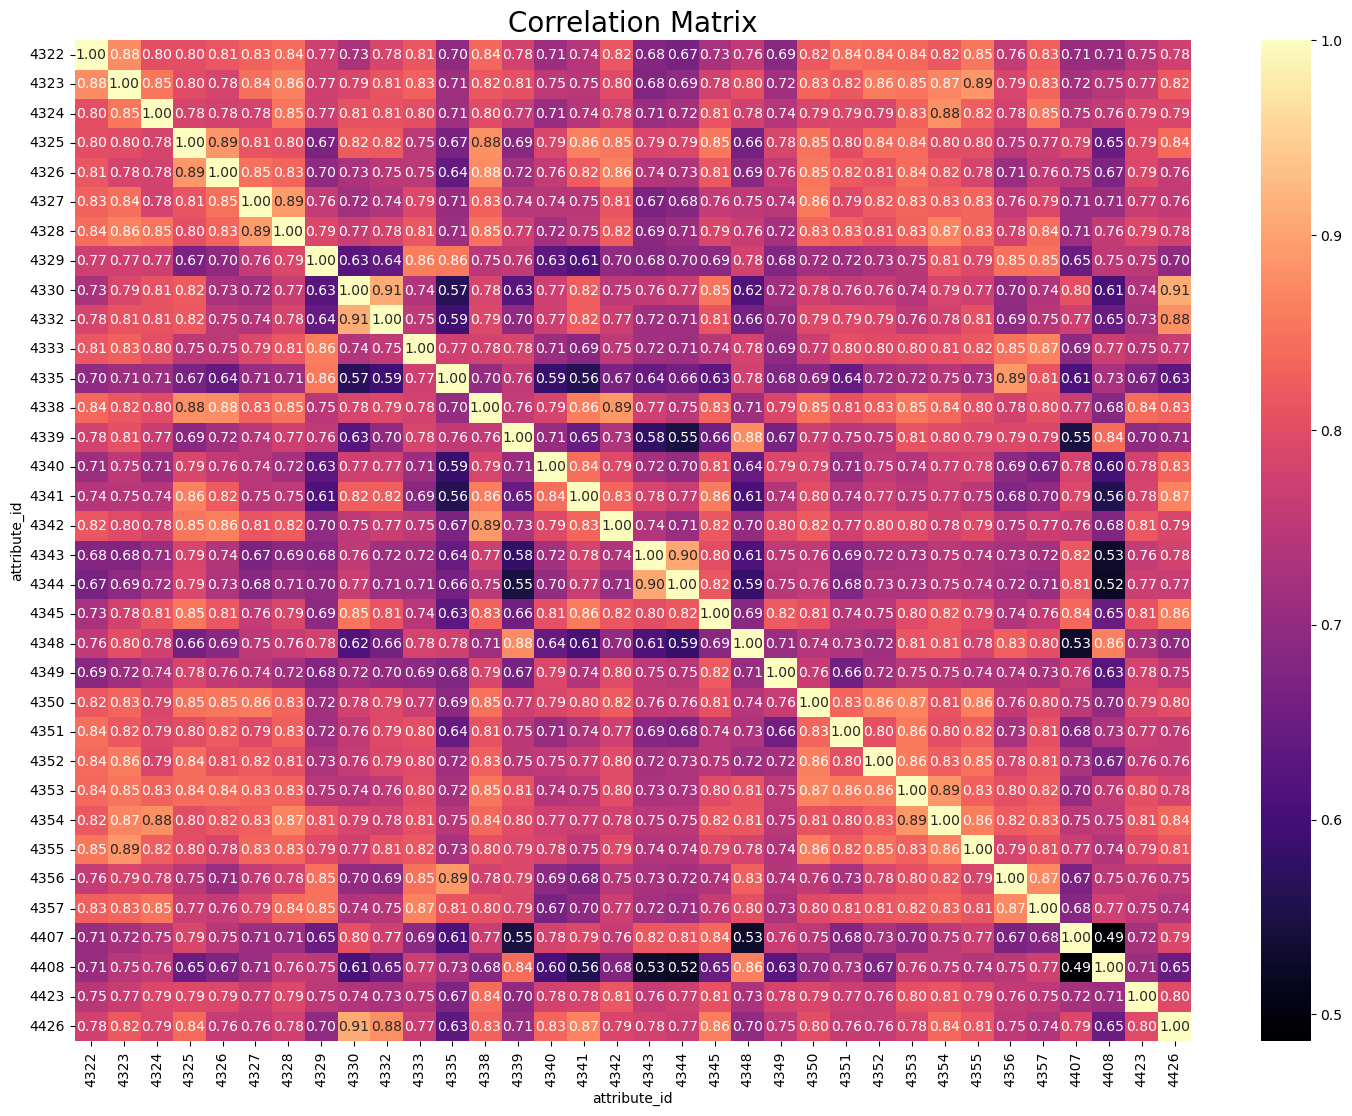

In [30]:
# Plot the correlation matrix.


# Korelasyon Matrisi
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(dff_pivot_table[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

#### 2.5 )Analysis of Numerical Variables by Target

In [31]:
# This function calculates and prints the mean of a numerical column, grouped by the target variable.

def target_summary_with_num(dataframe, target, numerical_col):
    
    # Group the dataframe by the target variable and calculate the mean of the numerical column for each group.
    # The .agg() method is used to apply the mean function to the specified numerical column.
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

# Iterate over each numerical column in the list of numerical columns.
for col in num_cols:
    # Call the target_summary_with_num function for each numerical column to print the mean values grouped by the target.
    target_summary_with_num(dff_pivot_table, "potential_label", col)

attribute_id      4322
potential_label       
average         57.143
highlighted     63.071


attribute_id      4323
potential_label       
average         57.867
highlighted     62.089


attribute_id      4324
potential_label       
average         55.343
highlighted     59.732


attribute_id      4325
potential_label       
average         54.559
highlighted     66.116


attribute_id      4326
potential_label       
average         54.209
highlighted     64.446


attribute_id      4327
potential_label       
average         55.736
highlighted     59.536


attribute_id      4328
potential_label       
average         57.433
highlighted     61.304


attribute_id      4329
potential_label       
average         59.240
highlighted     60.812


attribute_id      4330
potential_label       
average         55.872
highlighted     60.223


attribute_id      4332
potential_label       
average         56.836
highlighted     60.812


attribute_id      4333
potential_label       
average       

#### 3. ENCODING

In [32]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
binary_cols = [col for col in dff_pivot_table.columns if col in "potential_label"]

for col in binary_cols:
    label_encoder(dff_pivot_table, col)

#### 3.1 Scaling

In [33]:

scaler = StandardScaler()
dff_pivot_table[num_cols] = scaler.fit_transform(dff_pivot_table[num_cols])

In [34]:
dff_pivot_table

attribute_id,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,-0.543,-0.559,-1.405,-0.438,-0.767,-0.795,-0.907,-0.792,-0.446,-0.123,-1.224,-1.036,-1.126,-1.009,-0.542,-0.690,-0.535,-1.067,-1.206,-1.005,-1.314,-1.042,-0.693,-0.436,0.013,-1.282,-1.132,-0.495,-1.235,-1.520,-0.143,-1.487,-0.955,-0.253
1,1356362,9,0,0.595,0.561,0.679,0.683,0.723,0.723,0.601,0.404,0.728,0.691,0.459,0.996,0.632,0.840,0.912,0.799,0.588,1.230,0.750,0.742,0.879,0.670,0.848,0.717,0.787,0.814,1.053,0.632,0.915,0.768,0.530,0.669,0.404,1.042
2,1356375,3,0,0.595,0.561,0.679,0.683,0.723,0.723,0.601,1.002,0.728,0.691,1.132,0.319,0.632,0.840,0.912,0.799,0.588,0.574,0.750,0.742,0.879,0.670,0.077,0.717,0.787,0.814,1.053,0.632,0.915,0.768,0.530,0.669,0.404,1.042
3,1356375,4,0,0.595,1.308,0.679,0.683,0.723,1.482,1.355,1.002,-0.055,0.691,0.459,0.996,1.335,1.580,0.185,0.799,0.588,-0.083,0.098,0.043,0.879,1.355,0.848,0.717,1.560,0.814,0.428,0.632,0.198,0.768,-0.143,0.669,-0.276,-0.253
4,1356411,9,0,0.595,0.561,1.373,1.430,0.723,0.723,0.601,0.404,2.294,1.505,0.459,0.996,0.632,0.101,0.185,0.799,1.337,0.574,0.750,0.742,0.252,1.355,0.077,0.717,0.787,0.115,0.428,0.632,0.198,0.768,1.874,-0.050,1.083,1.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1907347,5,0,0.595,1.308,1.373,-0.064,1.467,0.723,1.355,0.404,-0.055,1.505,1.132,0.319,0.632,0.840,1.639,0.055,0.588,0.574,0.750,0.742,1.505,2.724,0.848,1.485,0.787,0.814,0.428,0.632,0.198,0.768,1.202,1.387,1.763,-0.253
267,1907347,6,0,0.595,0.561,0.679,0.683,0.723,0.723,0.601,1.002,0.728,0.691,1.132,0.319,0.632,0.840,0.912,0.799,1.337,1.230,0.750,0.742,0.879,1.355,0.848,0.717,0.787,0.814,1.053,0.632,0.915,0.768,0.530,0.669,1.083,1.042
268,1909532,10,0,-0.163,-0.933,-0.710,-0.812,-0.022,-0.036,-0.153,-0.194,-2.404,-2.564,-1.560,-0.358,-0.071,-1.379,-1.996,-0.690,-0.909,-1.395,-1.206,-1.354,-1.627,-1.384,-1.464,-2.356,-0.761,-0.583,-0.196,-1.621,-1.235,0.006,-1.487,-1.487,-0.955,-2.194
269,1909724,2,1,1.354,1.308,1.373,1.430,1.467,1.482,1.355,1.002,0.728,0.691,1.132,1.674,1.335,0.840,1.639,0.799,1.337,0.574,0.750,1.441,1.505,1.355,1.618,1.485,1.560,1.512,1.053,0.632,0.915,0.768,1.202,1.387,1.083,1.042


**Developing a machine learning model to predict the potential labels of players**

In [36]:
y = dff_pivot_table["potential_label"]

X = dff_pivot_table.drop(["potential_label", "position_id", "player_id"], axis=1)

**Base Models**

In [54]:
def base_models(X, y, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"]):
    print("Base Models....")
    classifiers = [
        ('LR', LogisticRegression()),
        ('KNN', KNeighborsClassifier()),
        ("SVC", SVC(probability=True)),
        ("CART", DecisionTreeClassifier()),
        ("RF", RandomForestClassifier()),
        ('Adaboost', AdaBoostClassifier(algorithm='SAMME')),
        ('GBM', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier(eval_metric='logloss')),
        ('LightGBM', LGBMClassifier(force_col_wise=True, verbose=-1)),
        # ('CatBoost', CatBoostClassifier(verbose=False))
    ]

    # Skorlayıcıları tanımlayın ve zero_division parametresini ayarlayın
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'f1': make_scorer(f1_score, zero_division=1),
        'roc_auc': make_scorer(roc_auc_score, needs_proba=True),
        'precision': make_scorer(precision_score, zero_division=1),
        'recall': make_scorer(recall_score, zero_division=1)
    }

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
        print(f"########## {name} ##########")
        print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
        print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
        print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
        print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
        print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

# Örnek kullanım (X ve y verilerinizi tanımlayın)
# base_models(X, y)


In [55]:
base_models(X, y)

Base Models....
########## LR ##########
Accuracy: 0.8488
Auc: 0.8454
Recall: 0.4733
Precision: 0.7571
F1: 0.5538
########## KNN ##########
Accuracy: 0.8522
Auc: 0.7663
Recall: 0.3233
Precision: 0.9333
F1: 0.4463
########## SVC ##########
Accuracy: 0.8487
Auc: 0.8713
Recall: 0.29
Precision: 0.9667
F1: 0.4286
########## CART ##########
Accuracy: 0.8337
Auc: 0.7712
Recall: 0.6633
Precision: 0.5964
F1: 0.6108
########## RF ##########
Accuracy: 0.8708
Auc: 0.9044
Recall: 0.4533
Precision: 0.9
F1: 0.5698
########## Adaboost ##########
Accuracy: 0.8635
Auc: 0.8946
Recall: 0.5067
Precision: 0.8042
F1: 0.5774
########## GBM ##########
Accuracy: 0.8487
Auc: 0.8851
Recall: 0.4867
Precision: 0.6967
F1: 0.5554
########## XGBoost ##########
Accuracy: 0.8746
Auc: 0.8739
Recall: 0.6133
Precision: 0.7663
F1: 0.6563
########## LightGBM ##########
Accuracy: 0.8856
Auc: 0.889
Recall: 0.5767
Precision: 0.8464
F1: 0.6605


**Hyperparameter Optimization**

In [70]:
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7, "auto"],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200]}



lightgbm_params = {"learning_rate": [0.01, 0.1],
               "n_estimators": [100, 300, 500, 1000],
               "colsample_bytree": [0.5, 0.7, 1]}

classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(force_col_wise=True,verbose= -1), lightgbm_params)]

In [71]:
classifiers = [('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(force_col_wise=True,verbose= -1), lightgbm_params)]

In [72]:
def hyperparameter_optimization(X, y, cv=3, scoring="roc_auc"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

In [73]:
best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## KNN ##########
roc_auc (Before): 0.7719
roc_auc (After): 0.7719
KNN best params: {'n_neighbors': 5}

########## CART ##########
roc_auc (Before): 0.7516
roc_auc (After): 0.7236
CART best params: {'max_depth': 1, 'min_samples_split': 2}

########## RF ##########
roc_auc (Before): 0.8943
roc_auc (After): 0.8829
RF best params: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 20, 'n_estimators': 200}

########## XGBoost ##########
roc_auc (Before): 0.8444
roc_auc (After): 0.8371
XGBoost best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}

########## LightGBM ##########
roc_auc (Before): 0.8774
roc_auc (After): 0.8457
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'n_estimators': 300}



**Stacking & Ensemble Learning**

In [74]:
def voting_classifier(best_models, X, y):
    print("Voting Classifier...")

    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)

    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

In [75]:
voting_clf = voting_classifier(best_models, X, y)

Voting Classifier...
Accuracy: 0.8634513634513635
F1Score: 0.540952380952381
ROC_AUC: 0.891813818801917


In [79]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X, y)

In [86]:
rf_model = RandomForestClassifier(random_state=17)

rf_best_grid = {"max_depth": [5, 8, None],
             "max_features": [3, 5, 7, "auto"],
             "min_samples_split": [2, 5, 8, 15, 20],
             "n_estimators": [100, 200, 500]}

In [88]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [89]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X, y)

**Feature Importance**

In [80]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

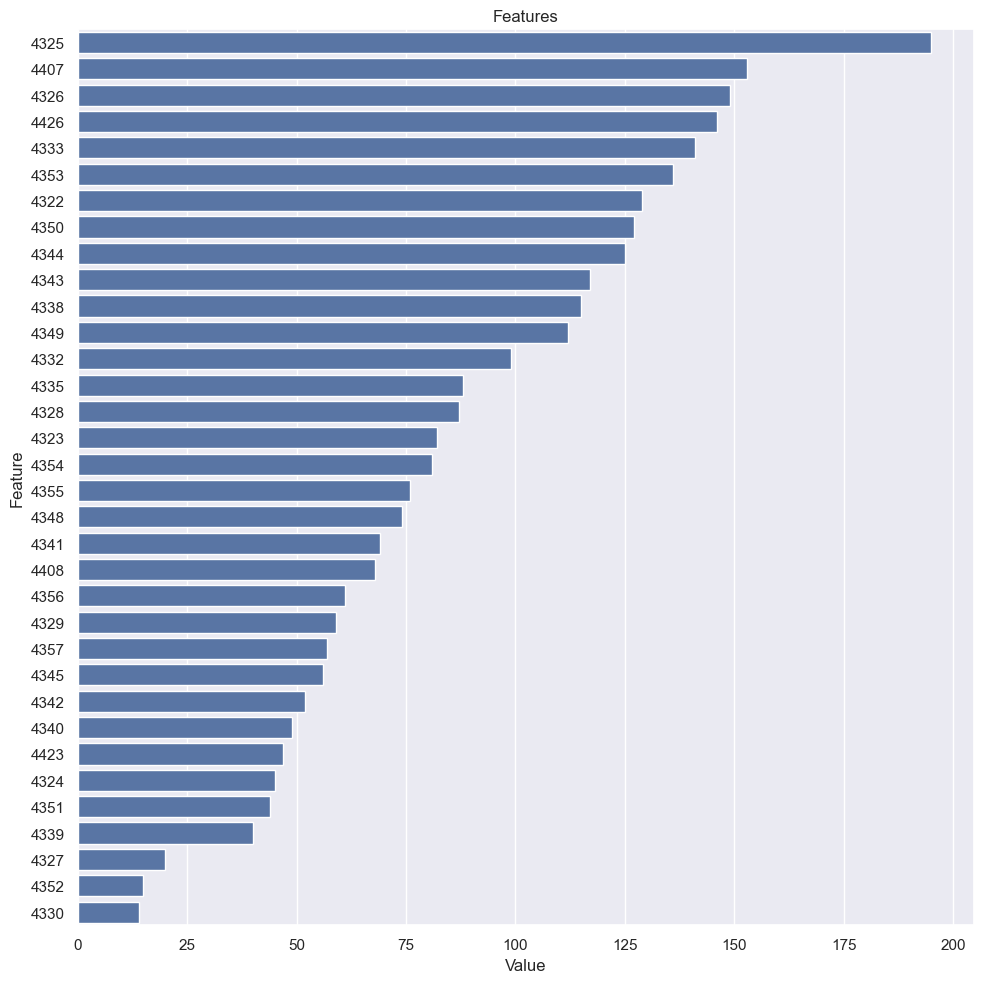

In [81]:
## GBM

plot_importance(lgbm_final, X)

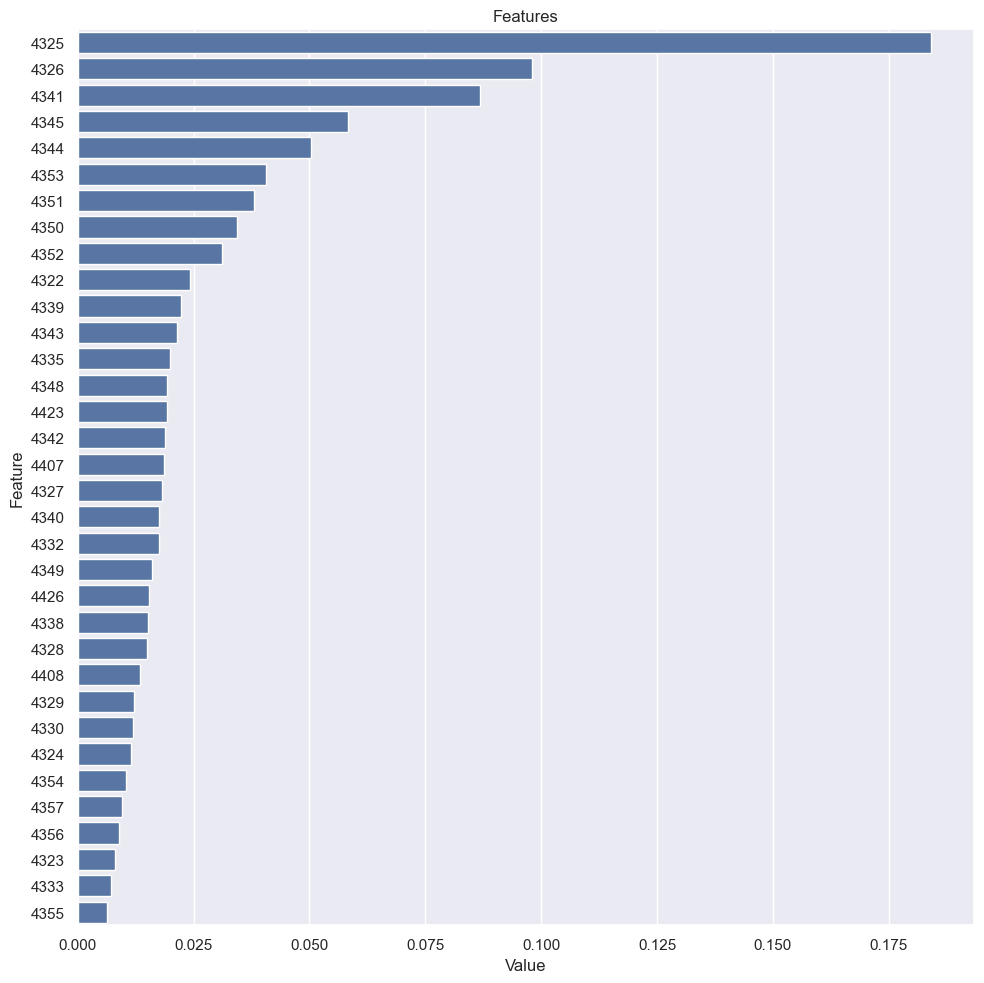

In [90]:
# RF
plot_importance(rf_final, X)